-------------------------------------------------------------------------------------------------------
# SCENARIO ANALYSIS: 
-------------------------------------------------------------------------------------------------------
## Baseline + Basic, Moderate, and Advanced Retrofit
## No IRA and IRA-Reference
-------------------------------------------------------------------------------------------------------

In [1]:
print("""
=====================================================================================================================================================================
SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
=====================================================================================================================================================================
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
""", "\n")


SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
 



In [2]:
# # Check required packages and dependencies:
# !pip freeze > requirements.txt

In [3]:
from config import PROJECT_ROOT
print(f"Imported PROJECT_ROOT from config.py: {PROJECT_ROOT}")

from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Format the name of the exported results file using the location ID
result_export_time = datetime.now()
model_run_date_time = result_export_time.strftime("%Y-%m-%d_%H-%M")

Project root directory: c:\users\14128\research\cmu-tare-model
Imported PROJECT_ROOT from config.py: c:\users\14128\research\cmu-tare-model


In [4]:
import os
from IPython import get_ipython

import pandas as pd

# Data Visualization Functions
from cmu_tare_model.utils.data_visualization import *

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['font.family'] = 'sans-serif' # Set the font for Matplotlib
plt.rcParams['font.sans-serif'] = 'Arial' # Set the font for Matplotlib

# At the beginning of your notebook or script
plt.close('all')  # Close any existing figures before creating new ones
# For Jupyter notebooks, ensure you have this at the top
%matplotlib inline

# Seaborn
import seaborn as sns
sns.set_theme(font='sans-serif', style='darkgrid') # Set the font and grid style for Seaborn

In [5]:
# pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [6]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        print(f"Enter the following input: {start_new_model_run}")

        if start_new_model_run == 'Y':
            print(f"Formatted date for use in file name: {model_run_date_time}")

            print(f"Project root directory: {PROJECT_ROOT}")

            # Relative path to the file from the project root
            relative_path = os.path.join("cmu_tare_model", "model_scenarios", "tare_run_simulation_v2_1.ipynb")

            # Construct the absolute path to the file
            file_path = os.path.join(PROJECT_ROOT, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")

            # On Windows, to avoid any path-escape quirks, convert backslashes to forward slashes
            file_path = file_path.replace("\\", "/")

            print(f"Running file: {file_path}")

            # iPthon magic command to run a .py file and import variables into the current IPython session
            if os.path.exists(file_path):
                get_ipython().run_line_magic('run', f'-i {file_path}')  # If your path has NO spaces, no quotes needed.
            else:
                print(f"File not found: {file_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {PROJECT_ROOT}")
            
            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    # except Exception as e:
    #     print("Invalid input. Please try again.")

    except Exception as e:
        print("An error occurred:", e)
        print("Please try again.")


Enter the following input: Y
Formatted date for use in file name: 2025-05-29_15-19
Project root directory: c:\users\14128\research\cmu-tare-model
File path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\model_scenarios\tare_run_simulation_v2_1.ipynb
Result outputs will be exported here: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results
Running file: c:/users/14128/research/cmu-tare-model/cmu_tare_model/model_scenarios/tare_run_simulation_v2_1.ipynb

The results will be exported using the export_model_run_output function.
Documentation for this function:
Export data for various result categories to appropriate directories.
    
    This function exports DataFrame results to CSV files in the appropriate 
    directory based on the results category and measure package. It supports
    the expanded sensitivity analysis categories and directory structure.
    
    Args:
        df_results_export: DataFrame containing the data to be exported.
        results_catego

In [7]:
# =======================================================================================================
# LOAD SCENARIO DATA: ORIGINAL APPROACH FOR REFERENCE (MP8)
# =======================================================================================================
# scenario_string = 'retrofit_basic_summary'
# df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# ... and so on
from cmu_tare_model.utils.load_exported_results_to_df import load_scenario_data

print(f"""
====================================================================================================================================================================
LOAD SCENARIO DATA
====================================================================================================================================================================
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
{load_scenario_data.__doc__}

-----------------------------------------------------------------------------------------------
LOADING SCENARIO DATA ...

These parameters are common to all function calls:
Output folder path: {output_folder_path}
Model run date time: {model_run_date_time}
""")


LOAD SCENARIO DATA
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
Load scenario data from a specified folder and date.
    
    This function searches for files matching the given scenario and date
    in the specified folder path, and loads the first matching file as a
    pandas DataFrame. Includes optional chunked loading for memory efficiency
    when working with large datasets.
    
    Args:
        end_use: Description of the data being loaded (used for logging).
        output_folder_path: Base path where scenario folders are located.
        scenario_string: Path to the scenario data (can include subdirectories).
        model_run_date_time: Date/time string to filter files by (must be in filename).
        columns_to_string: Dictionary mapping column names/indices to string dtypes.
            Supports both string keys (column names) and in

-------------------------------------------------------------------------------------------------------
# Baseline Scenario: Measure Package 0 (MP0)
-------------------------------------------------------------------------------------------------------

In [8]:
# =======================================================================================================
# Baseline Scenario: Measure Package 0 (MP0)
# =======================================================================================================
columns_to_string = {16: str, 19: str, 20: str}
menu_mp = 0

scenario_string = 'baseline_summary\summary_baseline'

print(f"""
=======================================================================================================
Baseline Scenario: Measure Package 0 (MP0)
=======================================================================================================
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_baseline_home)


Baseline Scenario: Measure Package 0 (MP0)
Scenario Relative Path: baseline_summary\summary_baseline
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\baseline_summary\summary_baseline
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 180)
Loaded Whole-Home data for policy_scenario 'baseline_summary\summary_baseline' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle Atlantic      Middle Atlantic   
122              2176.0     Northeast  Middle Atlantic      Middle Atlantic   
150              1690.0     Northeast  Middle Atlantic      Middle Atlantic   
153              2176.0     Northeast  Middle Atlantic      Middle Atlantic   
162  

In [9]:
# # This creates a column in each dataframe for the specified end-use undergoing retrofit
# # This is helpful because older functions can be used without undergoing major refactoring and testing

# # Heating End-use Category and Base Fuel Column
# df_outputs_baseline_heating['end_use'] = 'heating'
# df_outputs_baseline_heating['base_fuel'] = df_outputs_baseline_home['base_heating_fuel']

# # Water Heating End-use Category and Base Fuel Column
# df_outputs_baseline_waterHeating['end_use'] = 'waterHeating'
# df_outputs_baseline_waterHeating['base_fuel'] = df_outputs_baseline_home['base_waterHeating_fuel']

# # Clothes Drying End-use Category and Base Fuel Column
# df_outputs_baseline_clothesDrying['end_use'] = 'clothesDrying'
# df_outputs_baseline_clothesDrying['base_fuel'] = df_outputs_baseline_home['base_clothesDrying_fuel']

# # Cooking End-use Category and Base Fuel Column
# df_outputs_baseline_cooking['end_use'] = 'cooking'
# df_outputs_baseline_cooking['base_fuel'] = df_outputs_baseline_home['base_cooking_fuel']

-------------------------------------------------------------------------------------------------------
# Basic Retrofit: Measure Package 8 (MP8)
-------------------------------------------------------------------------------------------------------

In [10]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str}
menu_mp=8

# ========================== BASIC-AP2  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_ap2)

# ========================== BASIC-EASIUR  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_easiur)

# ========================== BASIC-InMAP ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_inmap)


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_basic_summary/summary_basic_ap2
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_basic_summary/summary_basic_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 966)
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary/summary_basic_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle A

-------------------------------------------------------------------------------------------------------
# Moderate Retrofit: Measure Package 9 (MP9)
-------------------------------------------------------------------------------------------------------

In [11]:
# =======================================================================================================
# MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str}
menu_mp = 9

# ========================== MODERATE-AP2  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_ap2'

print(f"""
=======================================================================================================
MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_ap2)

# ========================== MODERATE-EASIUR  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_easiur)

# ========================== MODERATE-InMAP ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_inmap)


MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_moderate_summary/summary_moderate_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_moderate_summary/summary_moderate_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 982)
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary/summary_moderate_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle Atlantic      Mid

-------------------------------------------------------------------------------------------------------
# Advanced Retrofit: Measure Package 10 (MP10)
-------------------------------------------------------------------------------------------------------

In [12]:
# =======================================================================================================
# ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 213: str}
menu_mp = 10

# ========================== ADVANCED-AP2  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_ap2'

print(f"""
=======================================================================================================
ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_ap2)

# ========================== ADVANCED-EASIUR  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_easiur)

# ========================== ADVANCED-InMAP ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_inmap)


ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_advanced_summary/summary_advanced_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_advanced_summary/summary_advanced_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 997)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle Atlantic      M

# Adoption Rate Scenario Comparison

In [13]:
from cmu_tare_model.adoption_potential.determine_adoption_potential_sensitivity import adoption_decision
from cmu_tare_model.adoption_potential.data_processing.visuals_adoption_potential import (
    create_multiIndex_adoption_df,
    subplot_grid_adoption_vBar
)

print(f"""  
====================================================================================================================================================================
ADOPTION POTENTIAL VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
ADOPTION DECISION LOGIC
--------------------------------------------------------
determine_adoption_potential.py file contains the definition for the adoption_decision function.
      
Documentation for the adoption_decision function:
{adoption_decision.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
CREATE MULTI-INDEX DF FOR ADOPTION POTENTIAL
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the create_multiIndex_adoption_df function.

Documentation for the create_multiIndex_adoption_df function:
{create_multiIndex_adoption_df.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
VISUALIZE ADOPTION POTENTIAL SUBPLOT GRID
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the subplot_grid_adoption_vBar function.
      
Documentation for the subplot_grid_adoption_vBar function:
{subplot_grid_adoption_vBar.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

""")

  
ADOPTION POTENTIAL VISUALIZATION

--------------------------------------------------------
ADOPTION DECISION LOGIC
--------------------------------------------------------
determine_adoption_potential.py file contains the definition for the adoption_decision function.
      
Documentation for the adoption_decision function:

    Updates the provided DataFrame with new columns that reflect decisions about equipment adoption
    and public impacts based on net present values (NPV).
    
    This function evaluates equipment adoption potential by categorizing upgrades into four tiers
    based on economic feasibility. It also assesses public impacts (benefit or detriment) of retrofits.
    
    Args:
        df (pandas.DataFrame): The DataFrame containing home equipment data.
        menu_mp (int): Measure package identifier to use in column names.
        policy_scenario (str): Policy scenario that determines electricity grid projections.
            Accepted values: 'AEO2023 Referenc

## Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit


In [14]:
# =======================================================================================================
# SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# =======================================================================================================
# Common parameters
scc = 'central'

# ========================== AP2  ========================== 
rcm_model = 'ap2'

print(f"""
Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: {scc}
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== EASIUR  ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'h6c')


Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: central
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM

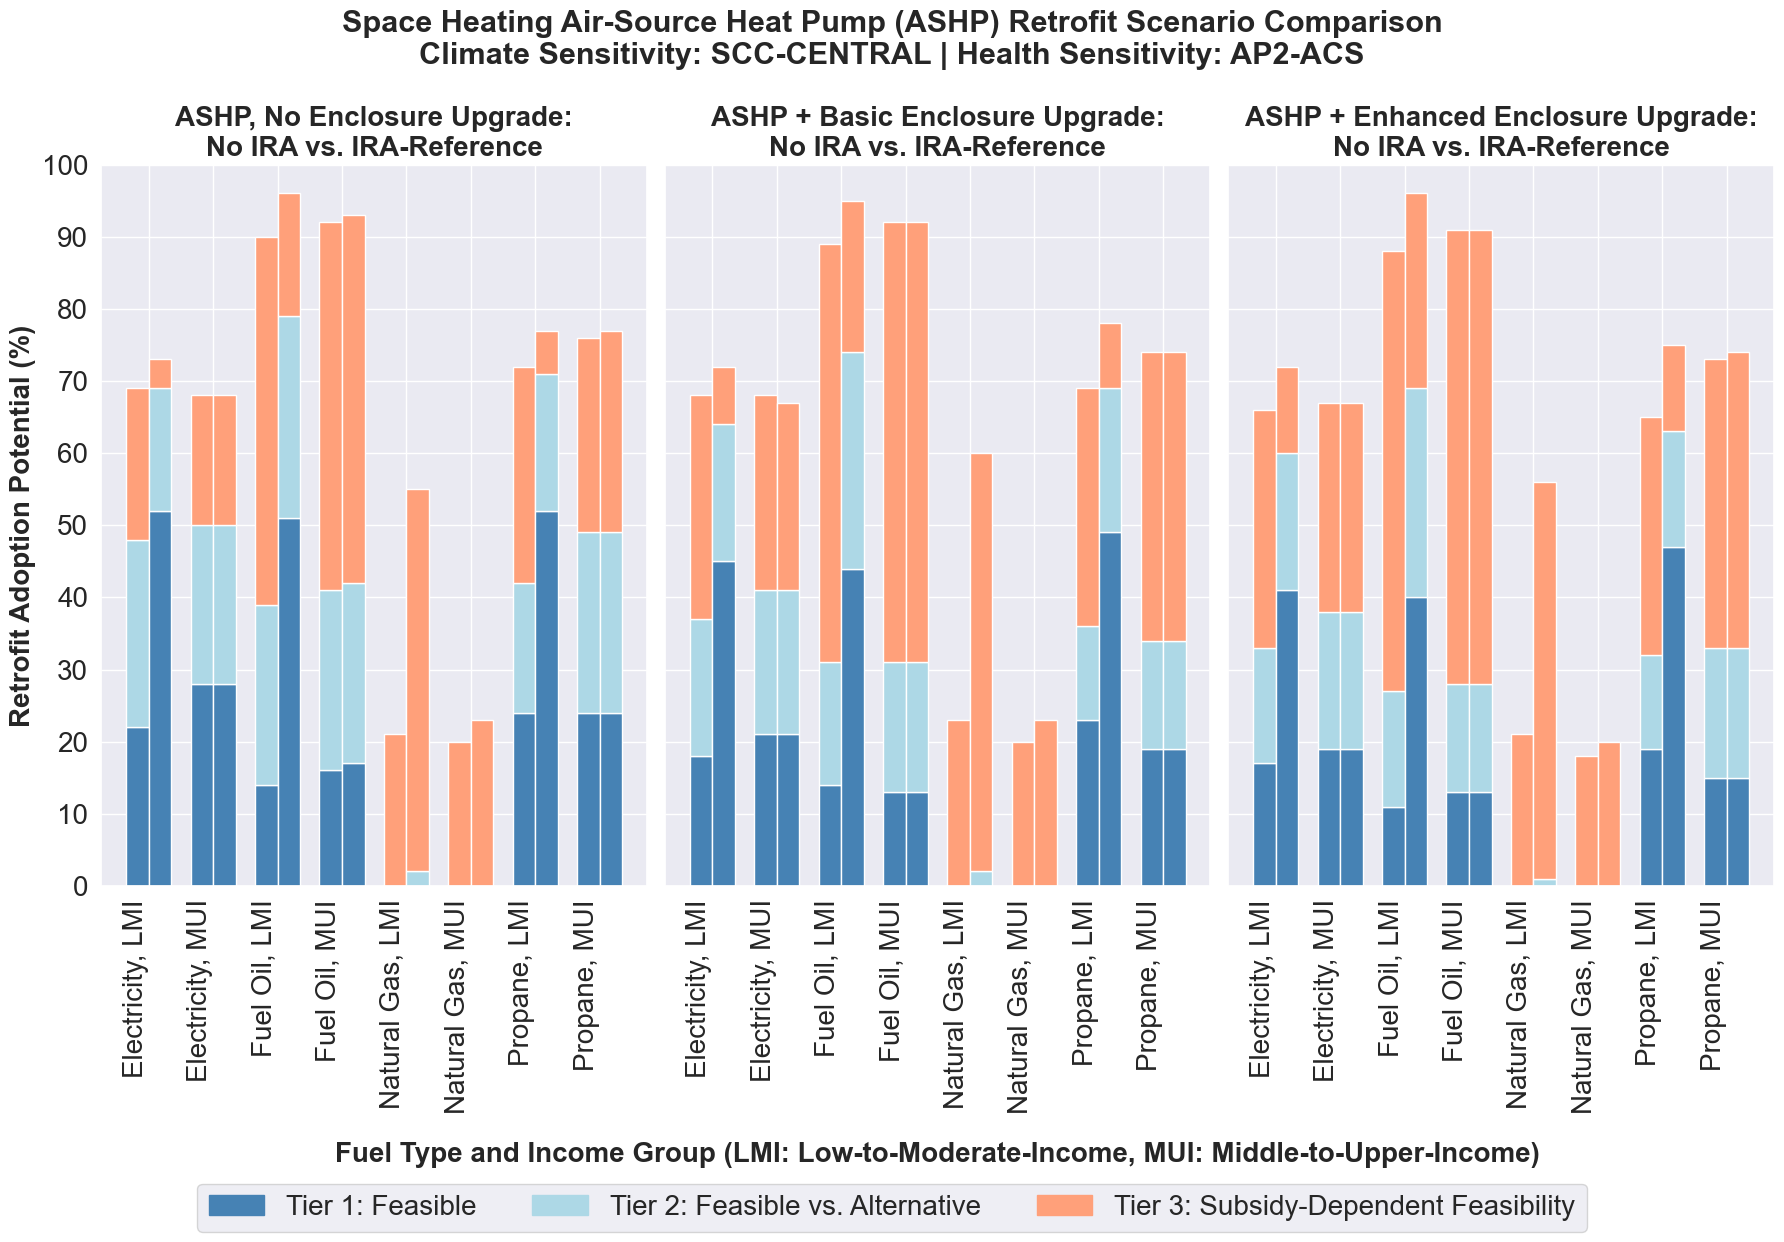

In [15]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'ap2'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_ap2_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_ap2_acs,
        df_mi_moderate_heating_adoption_ap2_acs, 
        df_mi_advanced_heating_adoption_ap2_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_ap2_acs

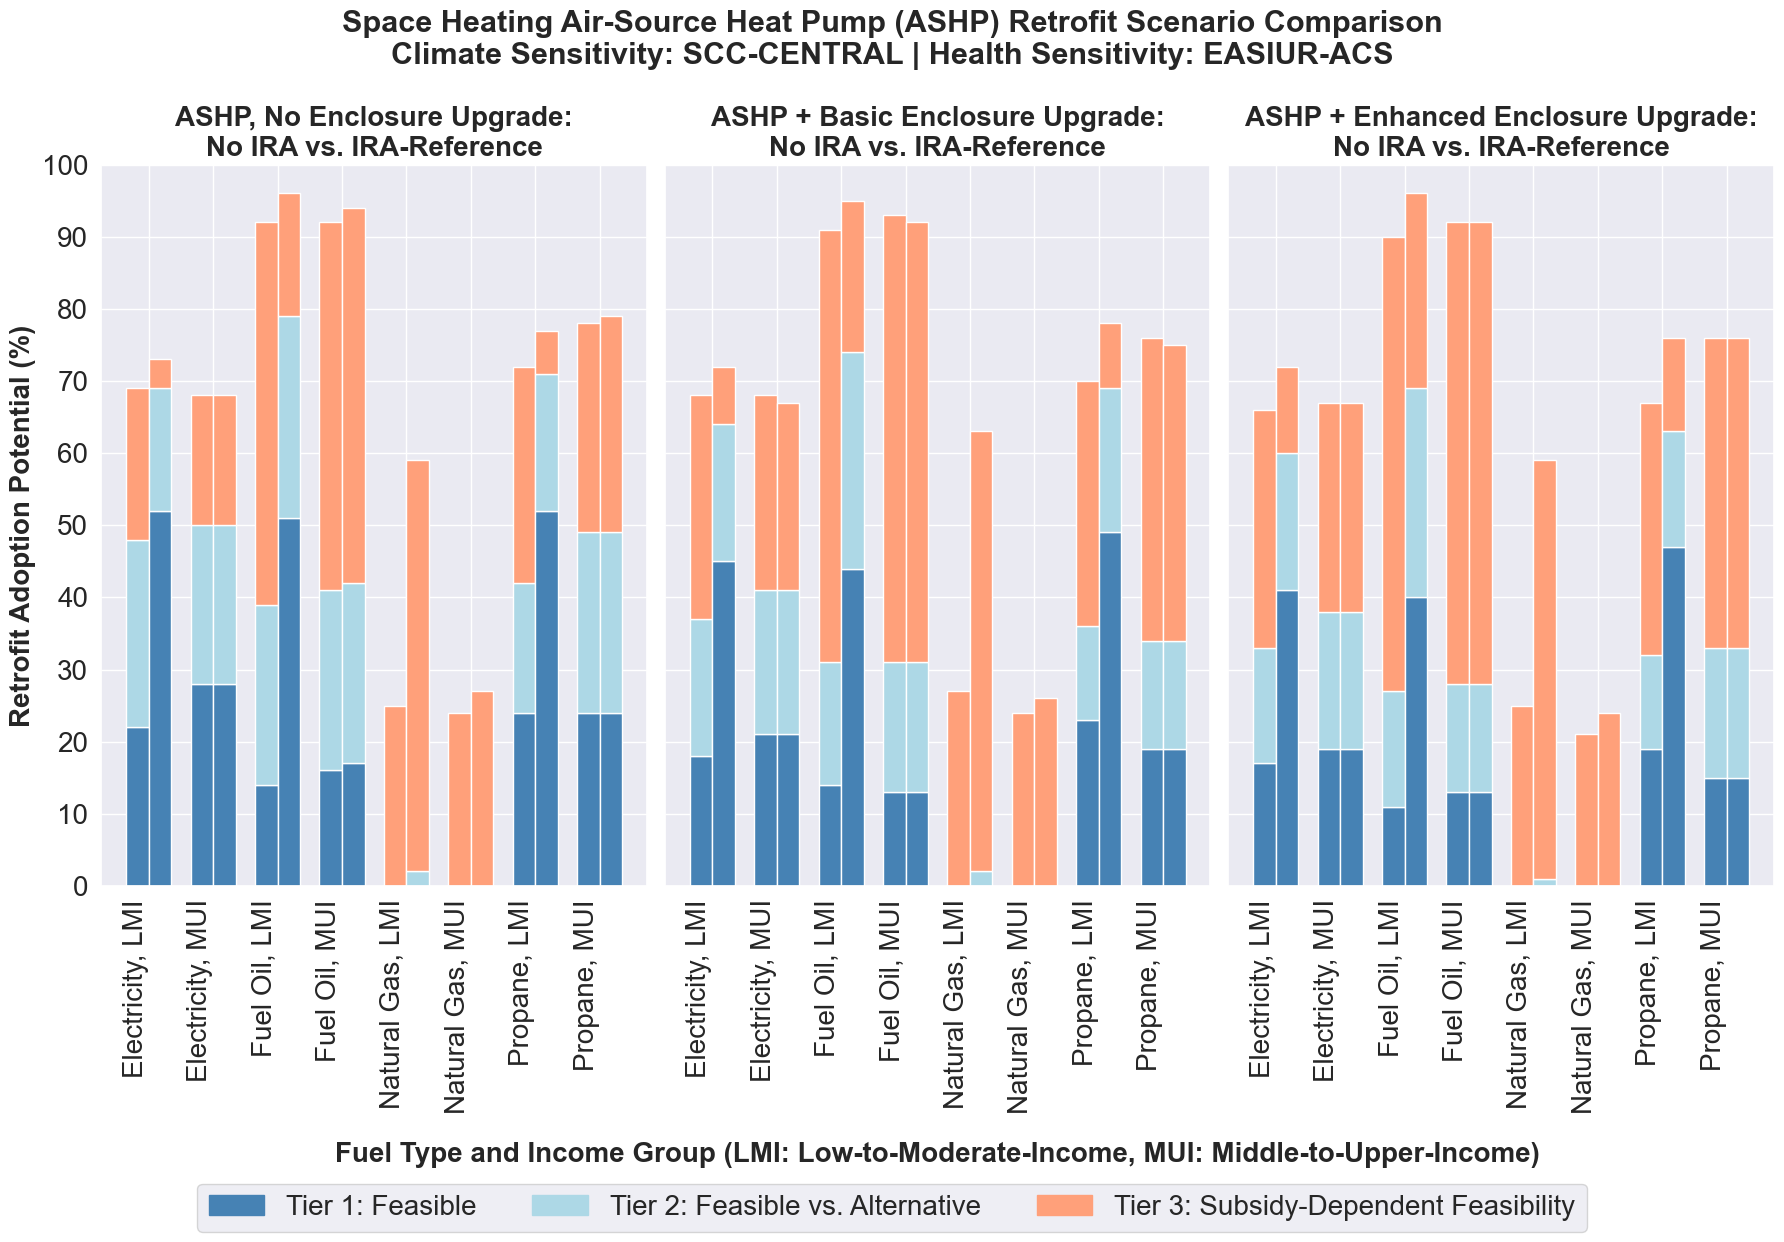

In [16]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'easiur'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_easiur_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_easiur_acs,
        df_mi_moderate_heating_adoption_easiur_acs, 
        df_mi_advanced_heating_adoption_easiur_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_easiur_acs

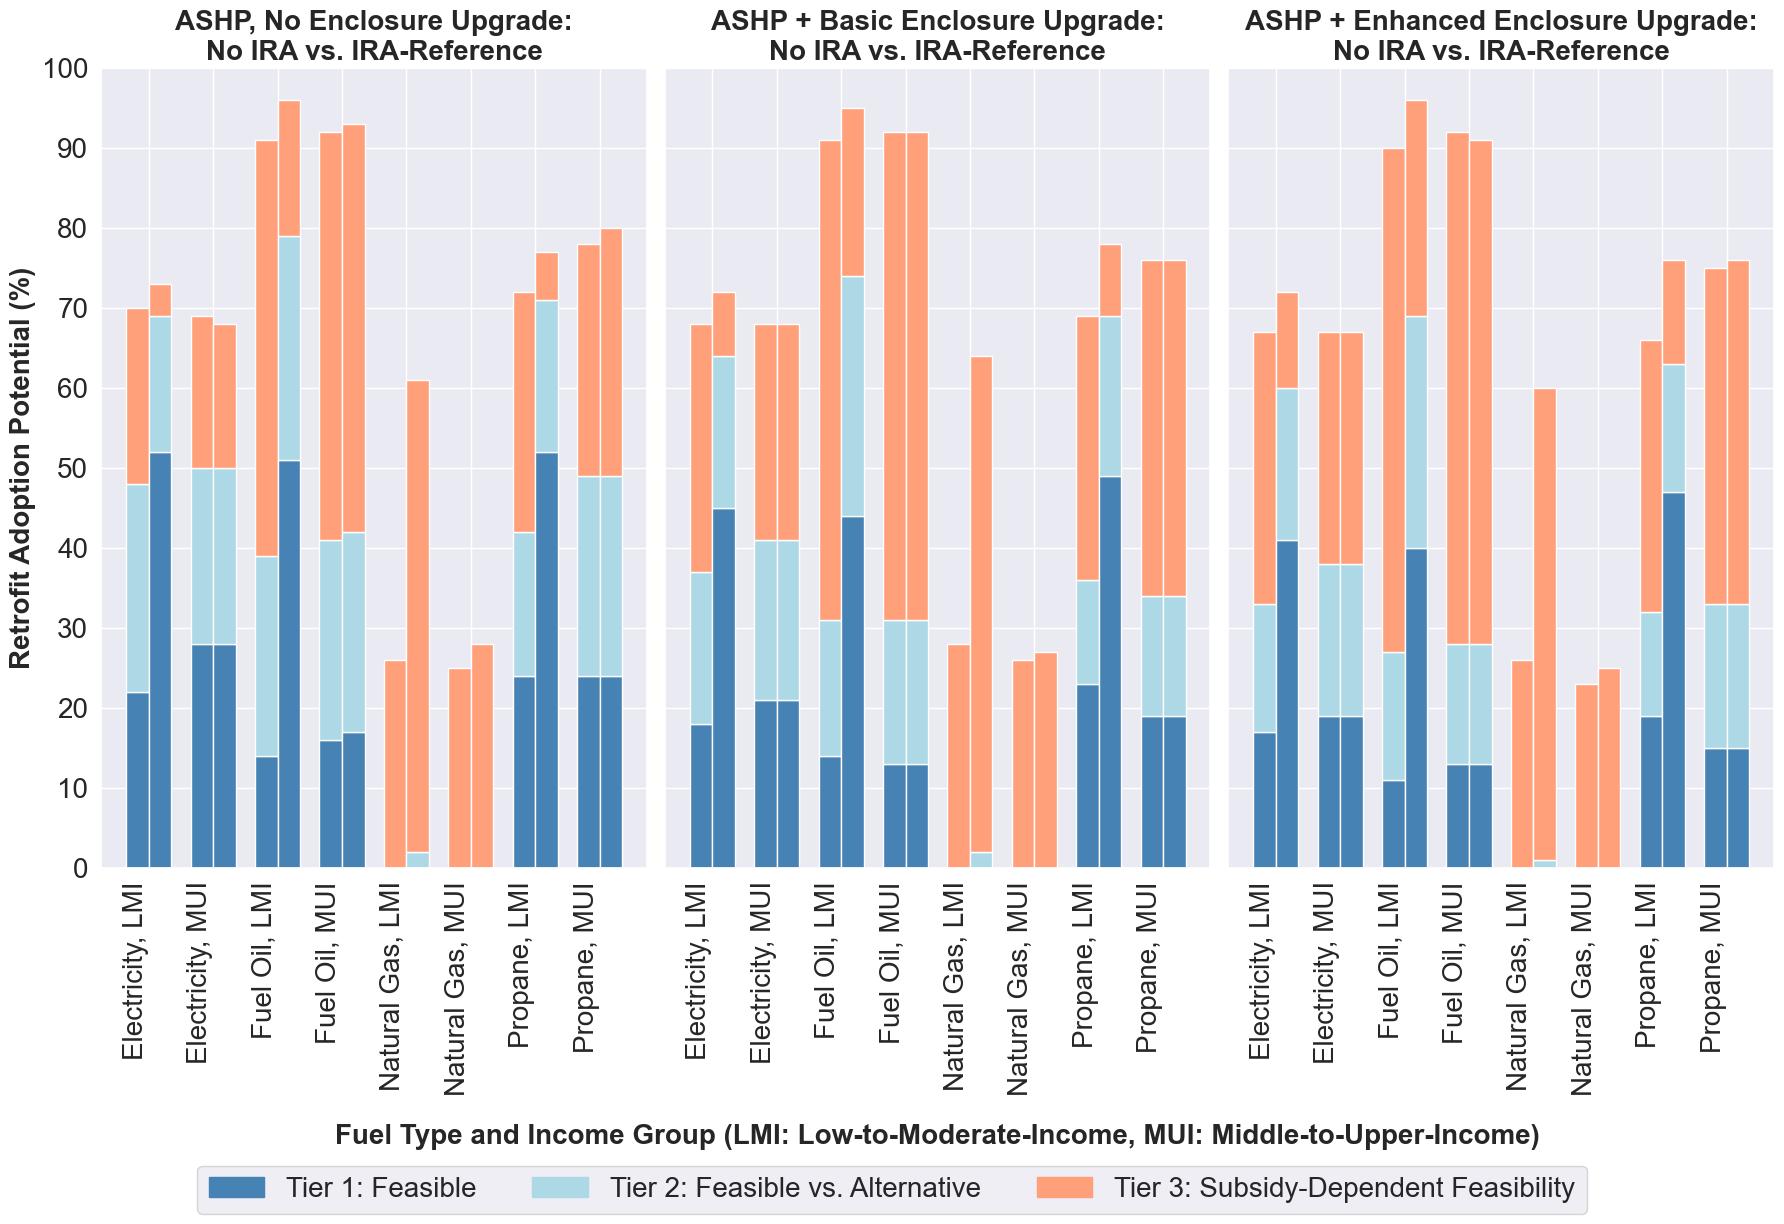

In [17]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_inmap_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_inmap_acs,
        df_mi_moderate_heating_adoption_inmap_acs, 
        df_mi_advanced_heating_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_inmap_acs

## Water Heating, Clothes Drying, and Cooking - Basic Retrofit (MP8)

In [18]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
menu_mp=8
scc = 'central'

# ========================== BASIC-AP2 ========================== 
rcm_model = 'ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-EASIUR ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'h6c')



BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: easiur
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIV

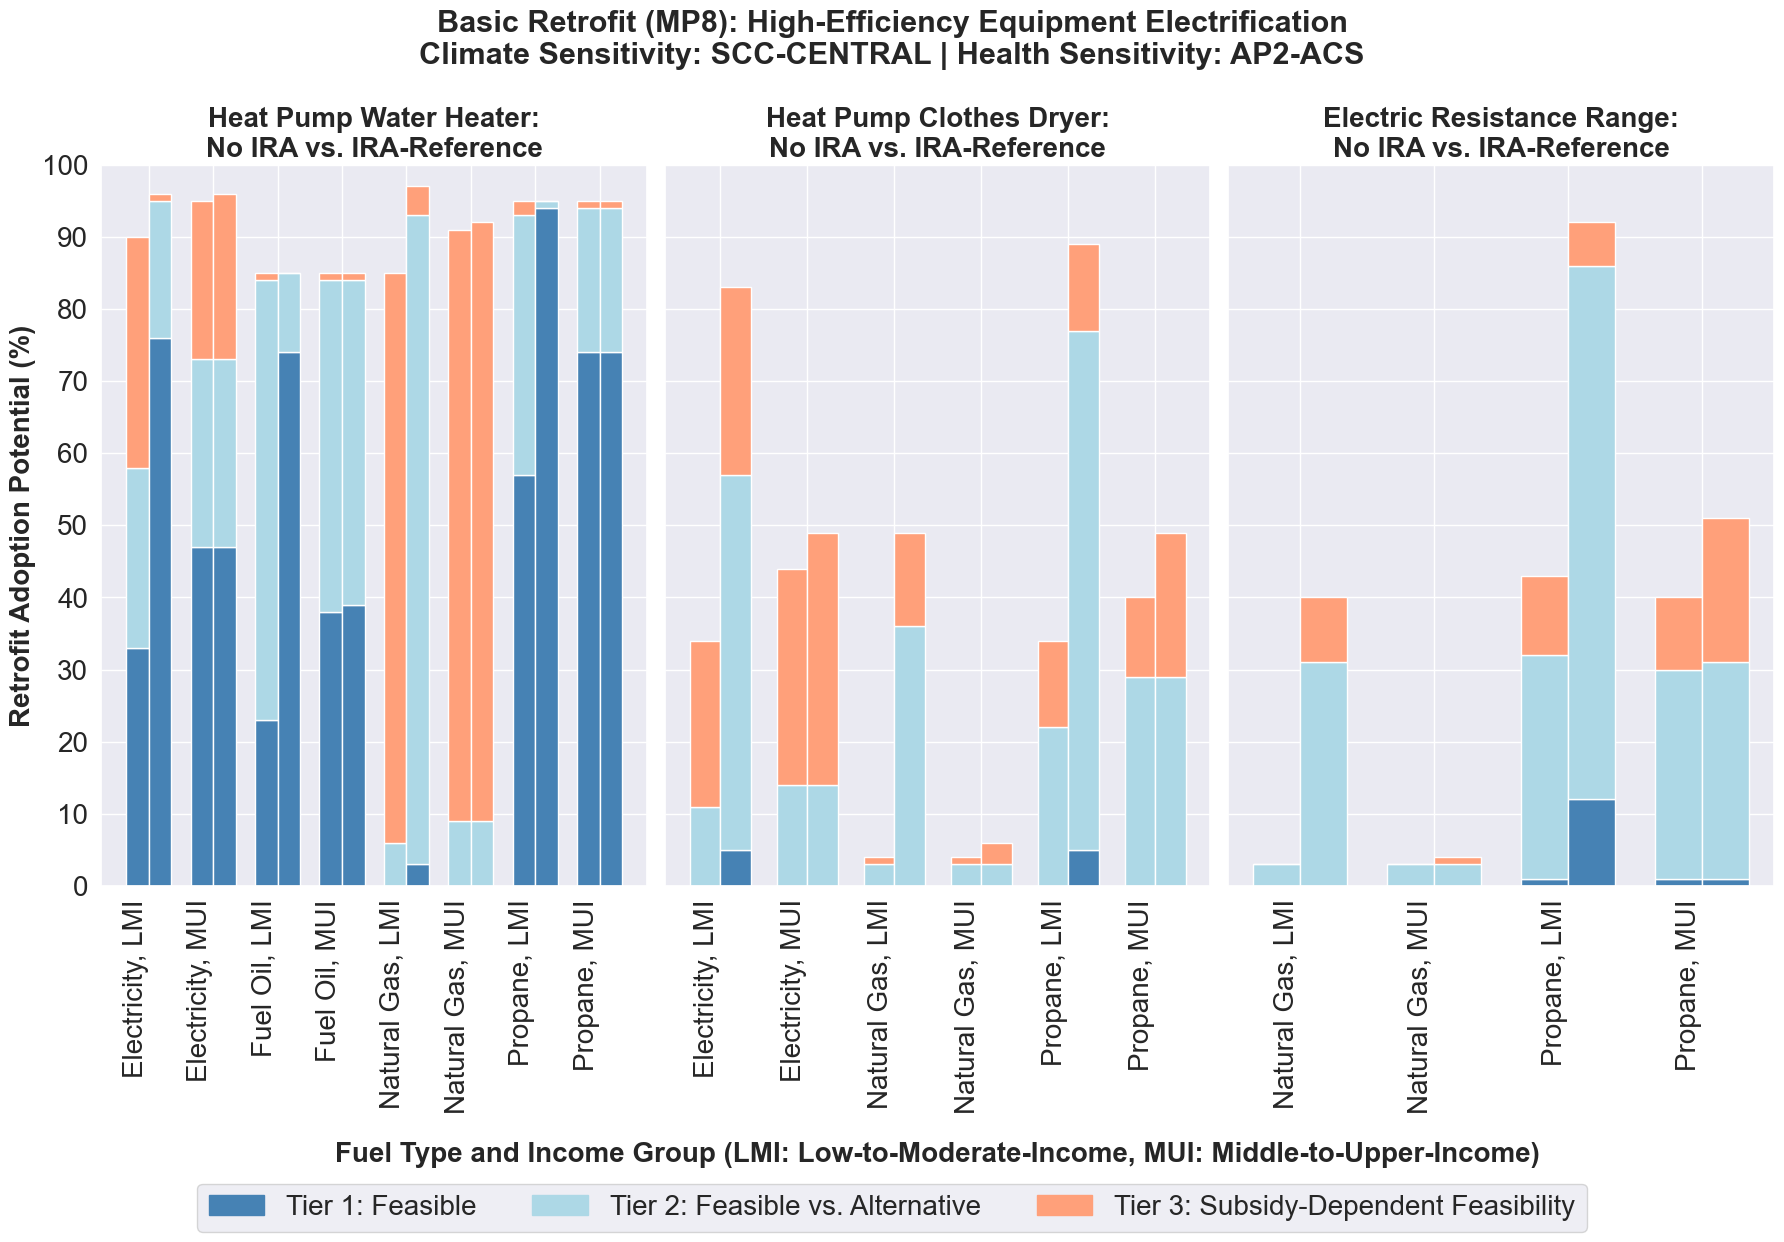

In [19]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'ap2'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_ap2_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_ap2_acs,
        df_mi_basic_clothesDrying_adoption_ap2_acs, 
        df_mi_basic_cooking_adoption_ap2_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_ap2_acs

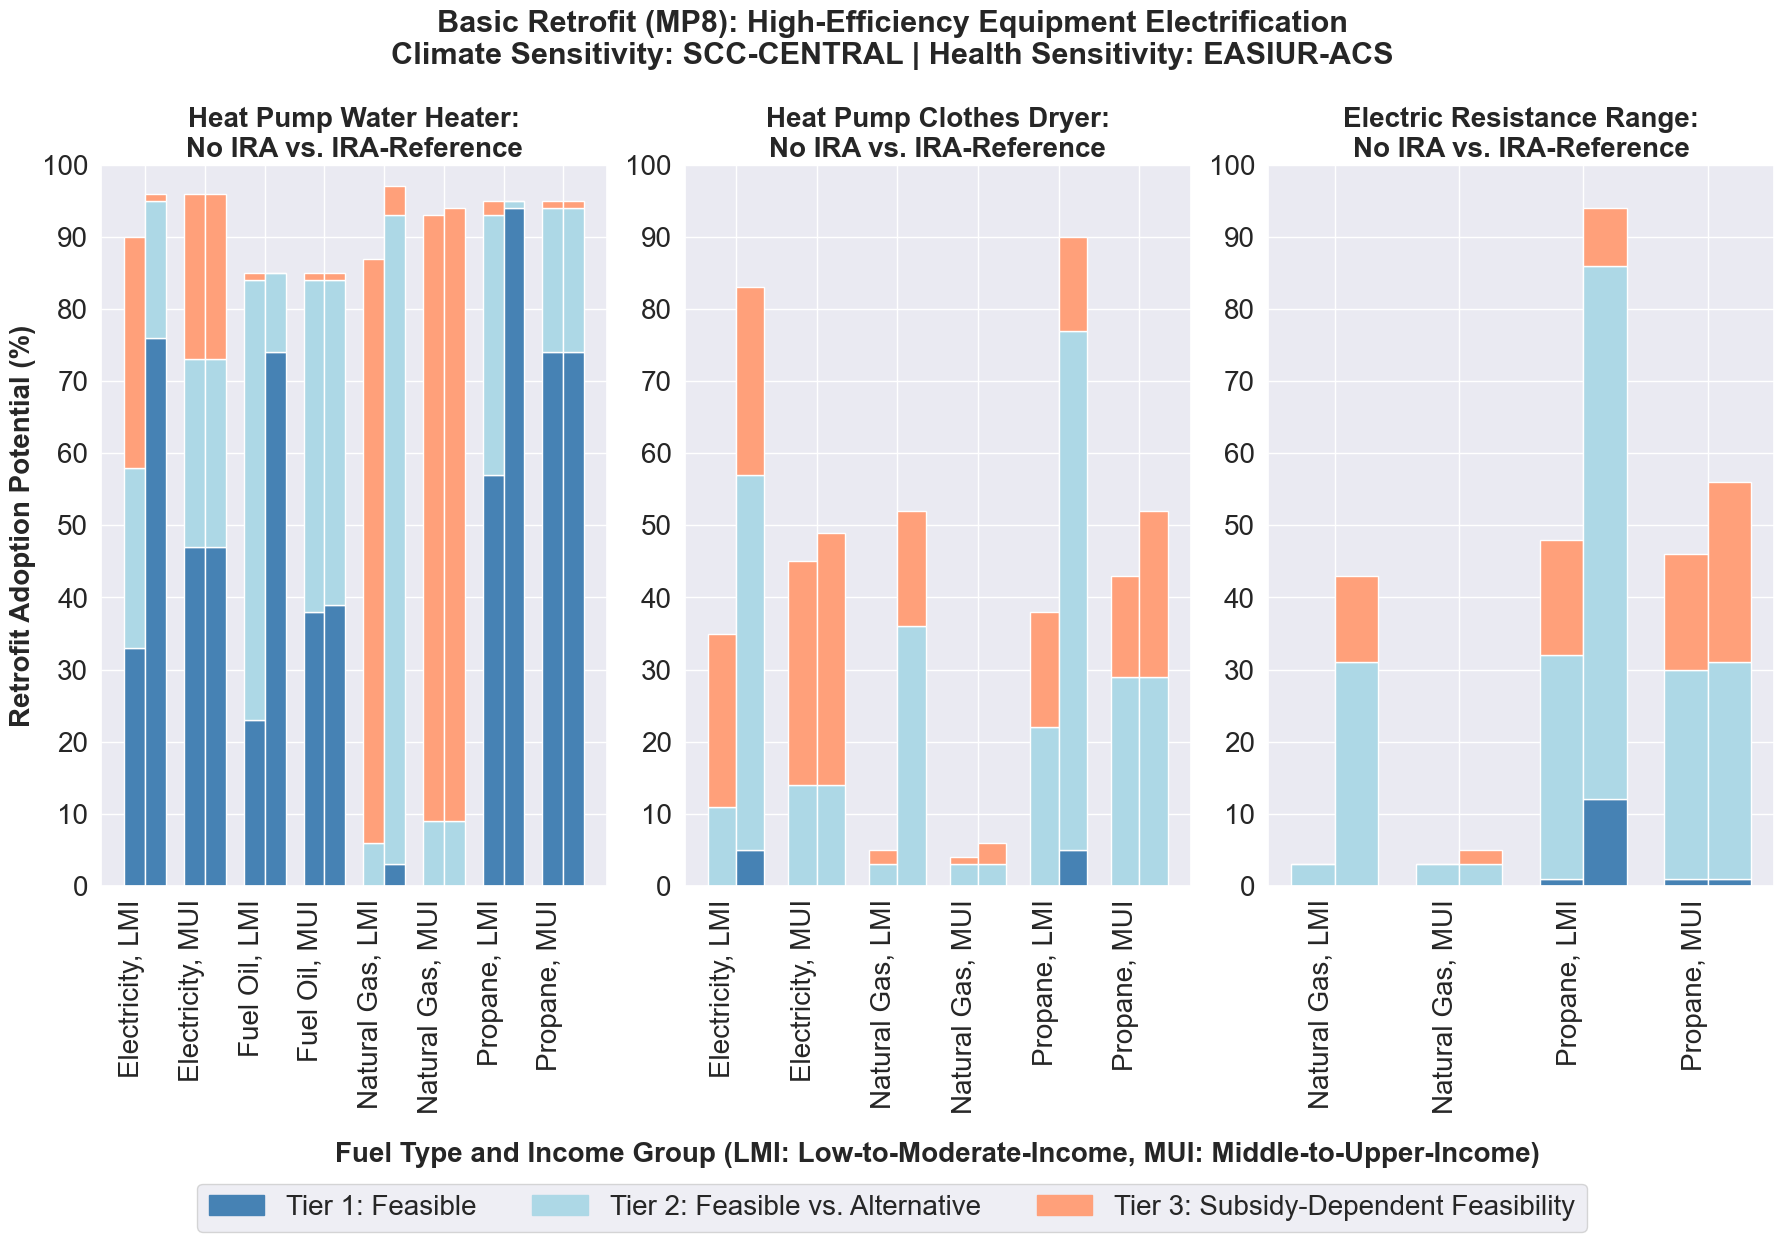

In [20]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'easiur'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_easiur_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_easiur_acs,
        df_mi_basic_clothesDrying_adoption_easiur_acs, 
        df_mi_basic_cooking_adoption_easiur_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=False,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_easiur_acs_fuelIncome

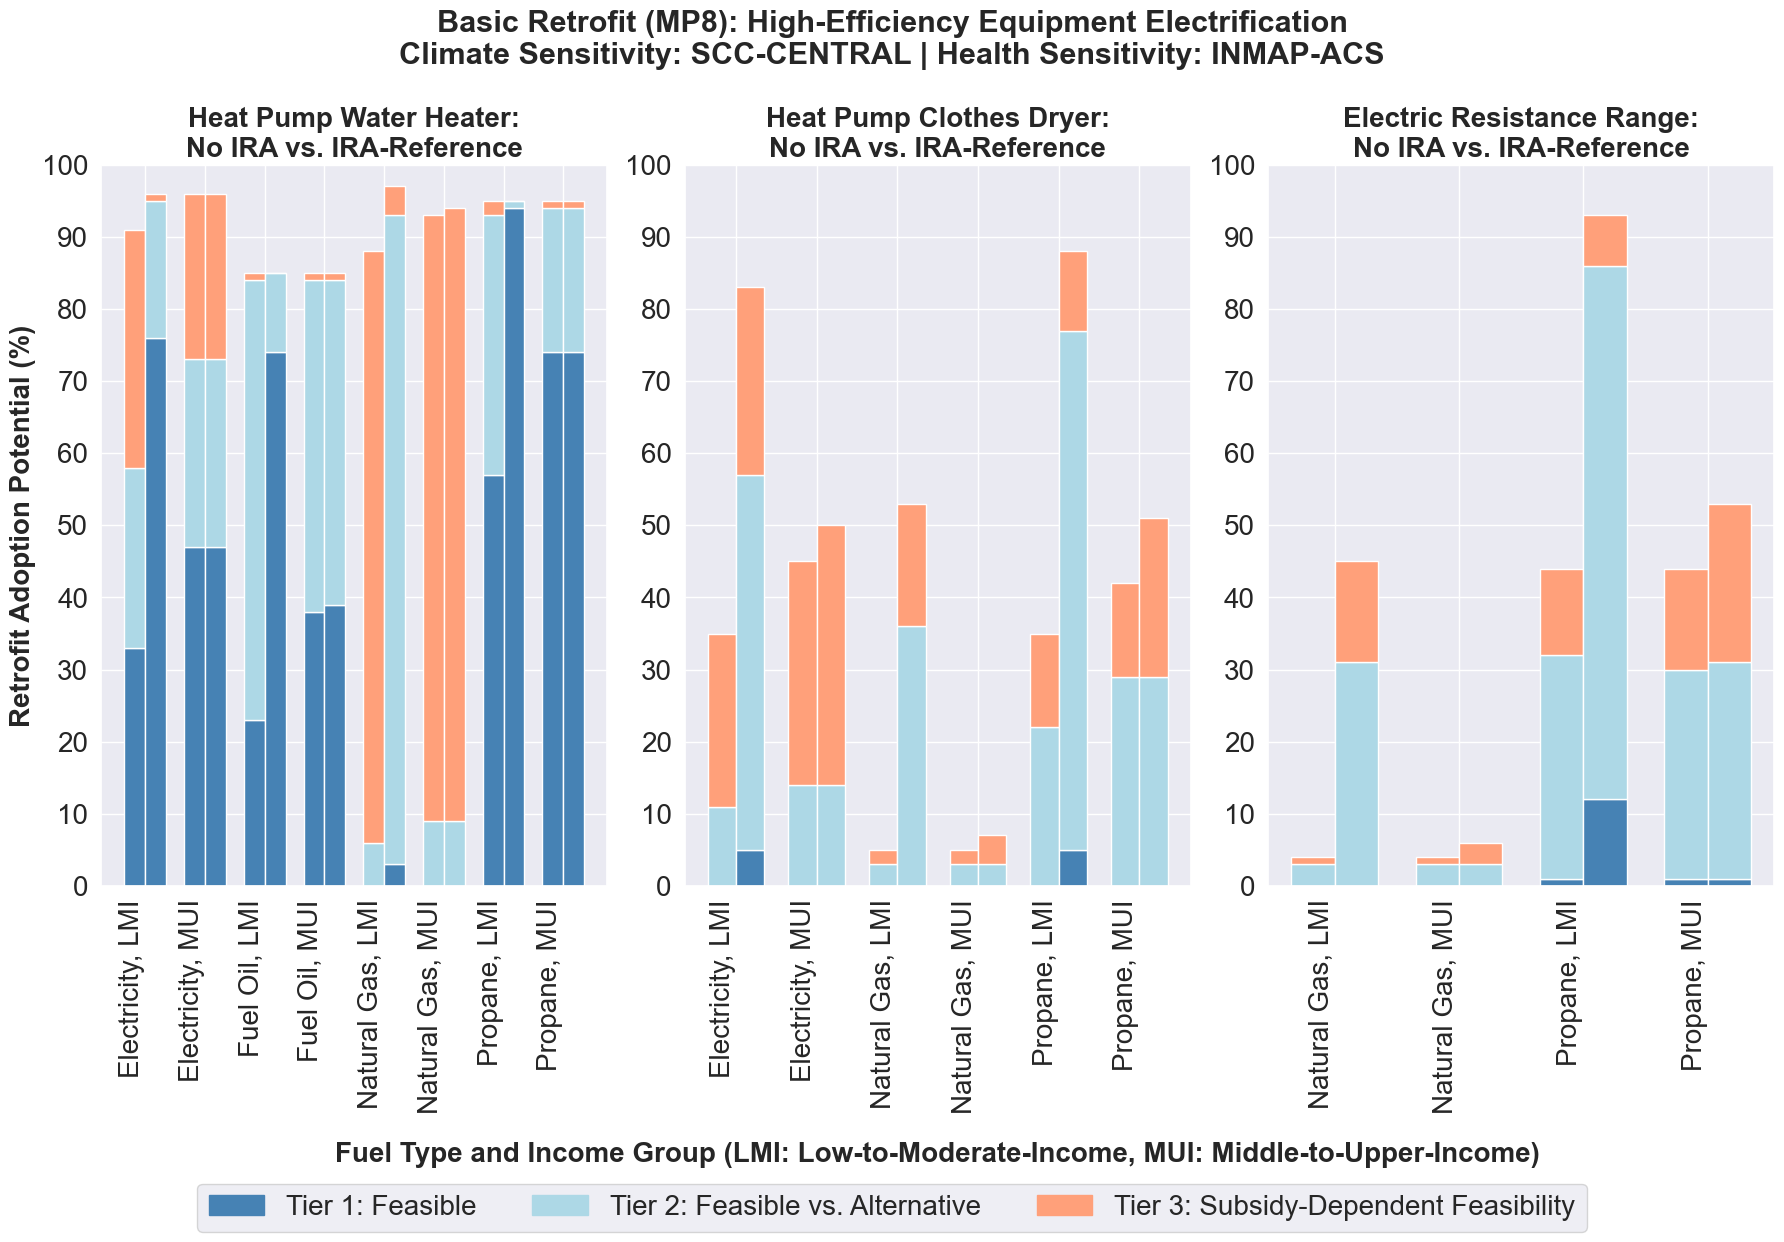

In [21]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_inmap_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_inmap_acs,
        df_mi_basic_clothesDrying_adoption_inmap_acs, 
        df_mi_basic_cooking_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=False,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_inmap_acs_fuelIncome

# Model Runtime

In [22]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 13 minutes and 51 seconds to execute.


# UNCERTAINTY ANALYSIS

In [25]:
from cmu_tare_model.utils.data_visualization import summarize_stats_table
from cmu_tare_model.utils.data_visualization_boxplots import create_subplot_grid_boxplot
from cmu_tare_model.utils.data_visualization_histograms import create_subplot_grid_histogram

print(f"""  
====================================================================================================================================================================
UNCERTAINTY ANALYSIS VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the summarize_stats_table function.
      
Documentation for the summarize_stats_table function:
{summarize_stats_table.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF BOXPLOTS
--------------------------------------------------------
data_visualization_boxplots.py file contains the definition for the create_subplot_grid_boxplot function.
      
Documentation for the create_subplot_grid_boxplot function:
{create_subplot_grid_boxplot.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF HISTOGRAMS
--------------------------------------------------------
data_visualization_histograms.py file contains the definition for the create_subplot_grid_histogram function.
      
Documentation for the create_subplot_grid_histogram function:
{create_subplot_grid_histogram.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
""")

  
UNCERTAINTY ANALYSIS VISUALIZATION

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the summarize_stats_table function.
      
Documentation for the summarize_stats_table function:

    Generate a formatted summary statistics table for specified columns in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame from which to compute statistics.
        data_columns (list[str]): The columns to include in the summary statistics.
        column_name_mapping (dict[str, str]): Mapping from original column names to desired display names.
        number_formatting (str): The Python format string (e.g. ".2f") to format numeric values in the output.
        include_zero (bool, optional): Whether to include zero values in the statistics. Defaults to True.
        category (str | None, optional): Category name for filtering fuel types 

## Climate Change Impact (SCC) and Tier 3 Adopters

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with AP2-ACS)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Optional, Tuple, Dict, Union
from matplotlib.ticker import FuncFormatter

# Color mapping (keeping original style)
color_map_fuel = {
    'Electricity': 'seagreen',
    'Natural Gas': 'steelblue',
    'Propane': 'orange',
    'Fuel Oil': 'gray',  # Changed to gray for accessibility
}


def thousands_formatter(x: float, pos: int) -> str:
    """Format numbers to use K for thousands automatically.
    
    Formats numeric values for axis labels, converting values >= 1000 to 
    use 'K' suffix (e.g., 2500 becomes '2.5K'). Used as a matplotlib 
    FuncFormatter for cleaner axis labels.
    
    Args:
        x: Numeric value to format
        pos: Position parameter required by matplotlib FuncFormatter (unused)
        
    Returns:
        Formatted string representation of the number
        
    Raises:
        TypeError: If x cannot be converted to a numeric value
    """
    # Validate input
    try:
        x_float = float(x)
    except (TypeError, ValueError):
        raise TypeError(f"Input value must be numeric, got {type(x).__name__}: {x}")
    
    if abs(x_float) >= 1000:
        return f'{x_float/1000:g}K'
    else:
        return f'{x_float:g}'


def create_subplot_histogram(
    ax: plt.Axes, 
    df: pd.DataFrame, 
    x_col: str, 
    bin_number: int, 
    x_label: Optional[str] = None, 
    y_label: Optional[str] = None, 
    lower_percentile: float = 2.5, 
    upper_percentile: float = 97.5, 
    color_code: str = 'base_fuel', 
    statistic: str = 'count', 
    include_zero: bool = False, 
    show_legend: bool = False
) -> None:
    """Creates a histogram on the provided axes using the specified DataFrame.
    
    This function is designed to be used within a grid of subplots. It filters
    data based on percentile ranges and creates a stacked histogram by fuel type
    with consistent formatting.
    
    Args:
        ax: Matplotlib Axes object where the histogram will be plotted
        df: DataFrame containing the data to plot
        x_col: Column name in df for x-axis data
        bin_number: Number of bins for the histogram
        x_label: Optional label for x-axis
        y_label: Optional label for y-axis
        lower_percentile: Lower percentile for data range filtering (0-100)
        upper_percentile: Upper percentile for data range filtering (0-100)
        color_code: Column name for color coding (usually fuel type)
        statistic: Statistic to compute ('count', 'density', 'probability', etc.)
        include_zero: Whether to include zero values in the visualization
        show_legend: Whether to show legend on this subplot
        
    Raises:
        KeyError: If x_col or color_code columns don't exist in the DataFrame
        ValueError: If percentile values are invalid
    """
    # Minimal validation - just check for column existence
    if x_col not in df.columns:
        raise KeyError(f"Column '{x_col}' not found in DataFrame. Available columns: {list(df.columns)}")
    
    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()
    
    # Remove zero values if specified
    if not include_zero:
        df_copy[x_col] = df_copy[x_col].replace(0, np.nan)

    # Calculate data range based on percentiles
    lower_limit = df_copy[x_col].quantile(lower_percentile / 100)
    upper_limit = df_copy[x_col].quantile(upper_percentile / 100)

    # Filter data to the specified range
    valid_data = df_copy[x_col][(df_copy[x_col] >= lower_limit) & (df_copy[x_col] <= upper_limit)]

    # Set the hue_order to match the unique fuel categories that exist in color_map
    hue_order = [fuel for fuel in df_copy[color_code].unique() if fuel in color_map_fuel]
    
    # Get colors only for the fuels that actually exist in the data (prevents palette warning)
    colors = [color_map_fuel[fuel] for fuel in hue_order]

    # Create the histogram
    sns.histplot(
        data=df_copy, 
        x=valid_data, 
        kde=False, 
        bins=bin_number, 
        hue=color_code, 
        hue_order=hue_order, 
        stat=statistic, 
        multiple="stack", 
        palette=colors, 
        ax=ax, 
        legend=show_legend
    )

    # Set labels if provided
    if x_label is not None:
        ax.set_xlabel(x_label, fontsize=22)

    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=22)

    # Set axis limits based on percentile range
    ax.set_xlim(left=lower_limit, right=upper_limit)
    ax.tick_params(axis='both', labelsize=22)

    # Add vertical reference line at x=0
    ax.axvline(x=0, color='black', linestyle='--', linewidth=3, alpha=0.8, zorder=10)
    
    # Format axis labels to use K for thousands
    ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    # Remove top and right spines for cleaner appearance
    sns.despine()


def create_subplot_grid_histogram(
    df: Optional[pd.DataFrame] = None,                    # Single DataFrame (backward compatible)
    dataframes: Optional[List[pd.DataFrame]] = None,      # Multiple DataFrames (NEW)
    dataframe_indices: Optional[List[int]] = None,        # DataFrame mapping (NEW)
    subplot_positions: Optional[List[Tuple[int, int]]] = None, 
    x_cols: Optional[List[str]] = None, 
    x_labels: Optional[List[str]] = None, 
    y_label: Optional[str] = None,
    y_labels: Optional[List[str]] = None,                 # Individual y-labels (NEW)
    bin_number: int = 20, 
    lower_percentile: float = 2.5, 
    upper_percentile: float = 97.5, 
    statistic: str = 'count', 
    color_code: str = 'base_fuel', 
    include_zero: bool = False, 
    suptitle: Optional[str] = None, 
    sharex: bool = False, 
    sharey: bool = False, 
    subplot_titles: Optional[List[str]] = None, 
    show_legend: bool = False,                            # Changed default to False
    figure_size: Tuple[int, int] = (12, 10)
) -> plt.Figure:
    """Creates a grid of histograms with support for single or multiple DataFrames.
    
    This function creates a customizable grid of histograms with flexible DataFrame handling.
    It supports both single DataFrame (backward compatible) and multiple DataFrame modes.
    
    Args:
        df: Single DataFrame for backward compatibility
        dataframes: List of DataFrames for multi-DataFrame visualizations
        dataframe_indices: List of indices mapping subplot positions to DataFrames
        subplot_positions: List of (row, column) tuples for subplot placement
        x_cols: List of column names for x-axis data in each subplot
        x_labels: Optional list of x-axis labels for each subplot
        y_label: Global y-axis label applied to all subplots (if y_labels not provided)
        y_labels: Optional list of individual y-axis labels for each subplot
        bin_number: Number of bins for the histograms
        lower_percentile: Lower percentile for data range filtering (0-100)
        upper_percentile: Upper percentile for data range filtering (0-100)
        statistic: Statistic to compute ('count', 'density', 'probability', etc.)
        color_code: Column name for color coding (usually fuel type)
        include_zero: Whether to include zero values in the visualization
        suptitle: Super title for the entire figure
        sharex: Whether to share x-axes across subplots
        sharey: Whether to share y-axes across subplots
        subplot_titles: Optional list of titles for each column
        show_legend: Whether to show legend for each subplot
        figure_size: Size of the figure as (width, height) in inches
        
    Returns:
        Matplotlib Figure object containing the grid of histograms
        
    Raises:
        ValueError: If input parameters are invalid or inconsistent
        KeyError: If specified columns don't exist in the DataFrame(s)
    """
    # Simple input validation (original style - minimal)
    if df is not None and dataframes is not None:
        raise ValueError("Specify either 'df' or 'dataframes', not both")
    if df is None and dataframes is None:
        raise ValueError("Must specify either 'df' or 'dataframes'")
    if subplot_positions is None or not subplot_positions:
        raise ValueError("subplot_positions must be provided and non-empty")
    if x_cols is None or not x_cols:
        raise ValueError("x_cols must be provided and non-empty")
    if len(subplot_positions) != len(x_cols):
        raise ValueError(f"Number of subplot positions ({len(subplot_positions)}) must match number of x columns ({len(x_cols)})")
    
    # Set up DataFrame handling (NEW functionality)
    if df is not None:
        # Single DataFrame mode (original behavior)
        df_list = [df]
        df_indices = [0] * len(subplot_positions)
    else:
        # Multiple DataFrame mode (NEW)
        df_list = dataframes
        if dataframe_indices is None:
            df_indices = [i % len(dataframes) for i in range(len(subplot_positions))]
        else:
            if len(dataframe_indices) != len(subplot_positions):
                raise ValueError("dataframe_indices length must match number of subplots")
            df_indices = dataframe_indices
    
    # Original grid setup logic (unchanged)
    num_subplots = len(subplot_positions)
    num_cols = max(pos[1] for pos in subplot_positions) + 1
    num_rows = max(pos[0] for pos in subplot_positions) + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)

    # FIX: Ensure axes is always 2D for consistent indexing
    # This handles the matplotlib edge case where single row/column returns 1D array
    if num_rows == 1 and num_cols == 1:
        axes = np.array([[axes]])  # Single subplot
    elif num_rows == 1:
        axes = np.array([axes])    # Single row, multiple columns
    elif num_cols == 1:
        axes = np.array([[ax] for ax in axes])  # Multiple rows, single column

    # Original dictionary mapping approach (now works with normalized 2D axes)
    subplot_axes = {(pos[0], pos[1]): axes[pos[0], pos[1]] for pos in subplot_positions}

    # Enhanced plot creation with multiple DataFrame support
    for i, (pos, x_col) in enumerate(zip(subplot_positions, x_cols)):
        # Get the appropriate DataFrame for this subplot (NEW)
        current_df = df_list[df_indices[i]]
        
        # Check column existence just once before calling helper function
        if x_col not in current_df.columns:
            raise KeyError(f"Column '{x_col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)}")
        
        # Get labels (enhanced with individual y-labels)
        x_label = x_labels[i] if x_labels else None
        current_y_label = y_labels[i] if y_labels else y_label  # NEW: individual y-labels
        
        # Create histogram using original function
        create_subplot_histogram(
            ax=subplot_axes[pos],
            df=current_df,  # Use appropriate DataFrame
            x_col=x_col,
            bin_number=bin_number,
            x_label=x_label,
            y_label=current_y_label,  # Use individual or global y-label
            lower_percentile=lower_percentile,
            upper_percentile=upper_percentile,
            statistic=statistic,
            color_code=color_code,
            include_zero=include_zero,
            show_legend=show_legend
        )

    # Original title logic (unchanged)
    if suptitle:
        plt.suptitle(suptitle, fontweight='bold', fontsize=22)

    if subplot_titles:
        for col_index, title in enumerate(subplot_titles):
            axes[0, col_index].set_title(title, fontsize=22, fontweight='bold')

    # Original legend logic with improved spacing
    legend_labels = list(color_map_fuel.keys())
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_map_fuel[label]) for label in legend_labels]
    fig.legend(
        legend_handles, 
        legend_labels, 
        loc='lower center', 
        ncol=len(legend_labels), 
        prop={'size': 22}, 
        labelspacing=0.5, 
        bbox_to_anchor=(0.5, -0.05)  # IMPROVED: More space between legend and x-ticks
    )             
    
    # Original layout logic with room for legend
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # IMPROVED: Reserve bottom space for legend
    
    return fig  # Return figure object


def print_positive_percentages_complete(
    df: Optional[pd.DataFrame] = None,
    dataframes: Optional[List[pd.DataFrame]] = None,
    dataframe_indices: Optional[List[int]] = None,
    column_names: List[str] = None,
    subplot_titles: Optional[List[str]] = None,
    fuel_column: str = 'base_fuel'
):
    """
    Print the percentage of positive values for each specified column across single or multiple DataFrames,
    with a breakdown by fuel type and information about missing/invalid data.
    
    Args:
        df: Single DataFrame for backward compatibility
        dataframes: List of DataFrames for multi-DataFrame analysis
        dataframe_indices: List of indices mapping columns to DataFrames
        column_names: List of column names to analyze
        subplot_titles: Optional list of display titles for each column
        fuel_column: Column name containing fuel type information
    """
    # Input validation
    if df is not None and dataframes is not None:
        print("Error: Specify either 'df' or 'dataframes', not both")
        return
    if df is None and dataframes is None:
        print("Error: Must specify either 'df' or 'dataframes'")
        return
    if column_names is None or not column_names:
        print("Error: column_names must be provided and non-empty")
        return
    
    # Set up DataFrame handling
    if df is not None:
        # Single DataFrame mode (original behavior)
        df_list = [df]
        df_indices = [0] * len(column_names)
    else:
        # Multiple DataFrame mode
        df_list = dataframes
        if dataframe_indices is None:
            df_indices = [i % len(dataframes) for i in range(len(column_names))]
        else:
            if len(dataframe_indices) != len(column_names):
                print("Error: dataframe_indices length must match number of columns")
                return
            df_indices = dataframe_indices
    
    # Get the known fuel types we want to report on (hard-coded to avoid sorting issues)
    # These should match the names in your color_map_fuel dictionary
    known_fuel_types = ['Electricity', 'Natural Gas', 'Propane', 'Fuel Oil']
    
    for i, col in enumerate(column_names):
        # Get the appropriate DataFrame for this column
        current_df = df_list[df_indices[i]]
        
        # Check if column exists in the current DataFrame
        if col not in current_df.columns:
            print(f"Warning: Column '{col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)[:10]} ...")
            continue
            
        # Check if fuel column exists in the current DataFrame
        if fuel_column not in current_df.columns:
            print(f"Warning: Fuel column '{fuel_column}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)[:10]} ...")
            continue
        
        # Get display name
        display_name = subplot_titles[i] if subplot_titles and i < len(subplot_titles) else col
        
        print(f"\n===== {display_name} =====")
        
        # Get total number of rows in the DataFrame
        total_df_rows = len(current_df)
        
        # Calculate overall statistics for non-NaN values
        total_non_nan = current_df[col].count()
        positive_count = (current_df[col] > 0).sum()
        positive_percentage = (positive_count / total_non_nan * 100) if total_non_nan > 0 else 0
        
        print(f"All: {positive_percentage:.1f}% positive ({positive_count:,} of {total_non_nan:,} values)")
        
        # Track the total rows accounted for by known fuel types
        accounted_rows = 0
        
        # Calculate statistics for each known fuel type
        for fuel in known_fuel_types:
            # Filter by fuel type
            fuel_data = current_df[current_df[fuel_column] == fuel]
            
            # Skip if no data for this fuel type
            if len(fuel_data) == 0:
                continue
                
            # Count rows for this fuel type
            fuel_rows = len(fuel_data)
            accounted_rows += fuel_rows
                
            # Count non-NaN values for this column
            fuel_total = fuel_data[col].count()
            
            # Count positive values
            fuel_positive = (fuel_data[col] > 0).sum()
            
            # Calculate percentage
            fuel_percentage = (fuel_positive / fuel_total * 100) if fuel_total > 0 else 0
            
            # Print results
            print(f"{fuel}: {fuel_percentage:.1f}% positive ({fuel_positive:,} of {fuel_total:,} values)")
        
        # Calculate remaining/unaccounted rows (either "Other Fuel" or NaN values)
        unaccounted_rows = total_df_rows - accounted_rows
        unaccounted_percentage = (unaccounted_rows / total_df_rows * 100)
        
        print(f"\nHomes with \"Other Fuel\" (Invalid Fuel/Tech) make up the remaining {unaccounted_rows:,} of {total_df_rows:,} total dataframe rows ({unaccounted_percentage:.1f}%).")
        print(f"NaN values in column: {total_df_rows - total_non_nan:,} rows ({((total_df_rows - total_non_nan) / total_df_rows * 100):.1f}% of dataframe)")
    

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with EASIUR-ACS)


===== Lower Bound =====
All: 44.6% positive (5,468 of 12,266 values)
Electricity: 95.4% positive (1,893 of 1,984 values)
Natural Gas: 9.1% positive (639 of 6,987 values)
Propane: 86.8% positive (427 of 492 values)
Fuel Oil: 89.5% positive (2,509 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== Central Estimate =====
All: 74.5% positive (9,135 of 12,266 values)
Electricity: 98.4% positive (1,952 of 1,984 values)
Natural Gas: 56.5% positive (3,945 of 6,987 values)
Propane: 96.1% positive (473 of 492 values)
Fuel Oil: 98.6% positive (2,765 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== Upper Bound =====
All: 88.9% positive (10,904 of 12,266 values)
Electricity: 99.3% positive (1,970 of 1,984 values)
Natural Gas: 

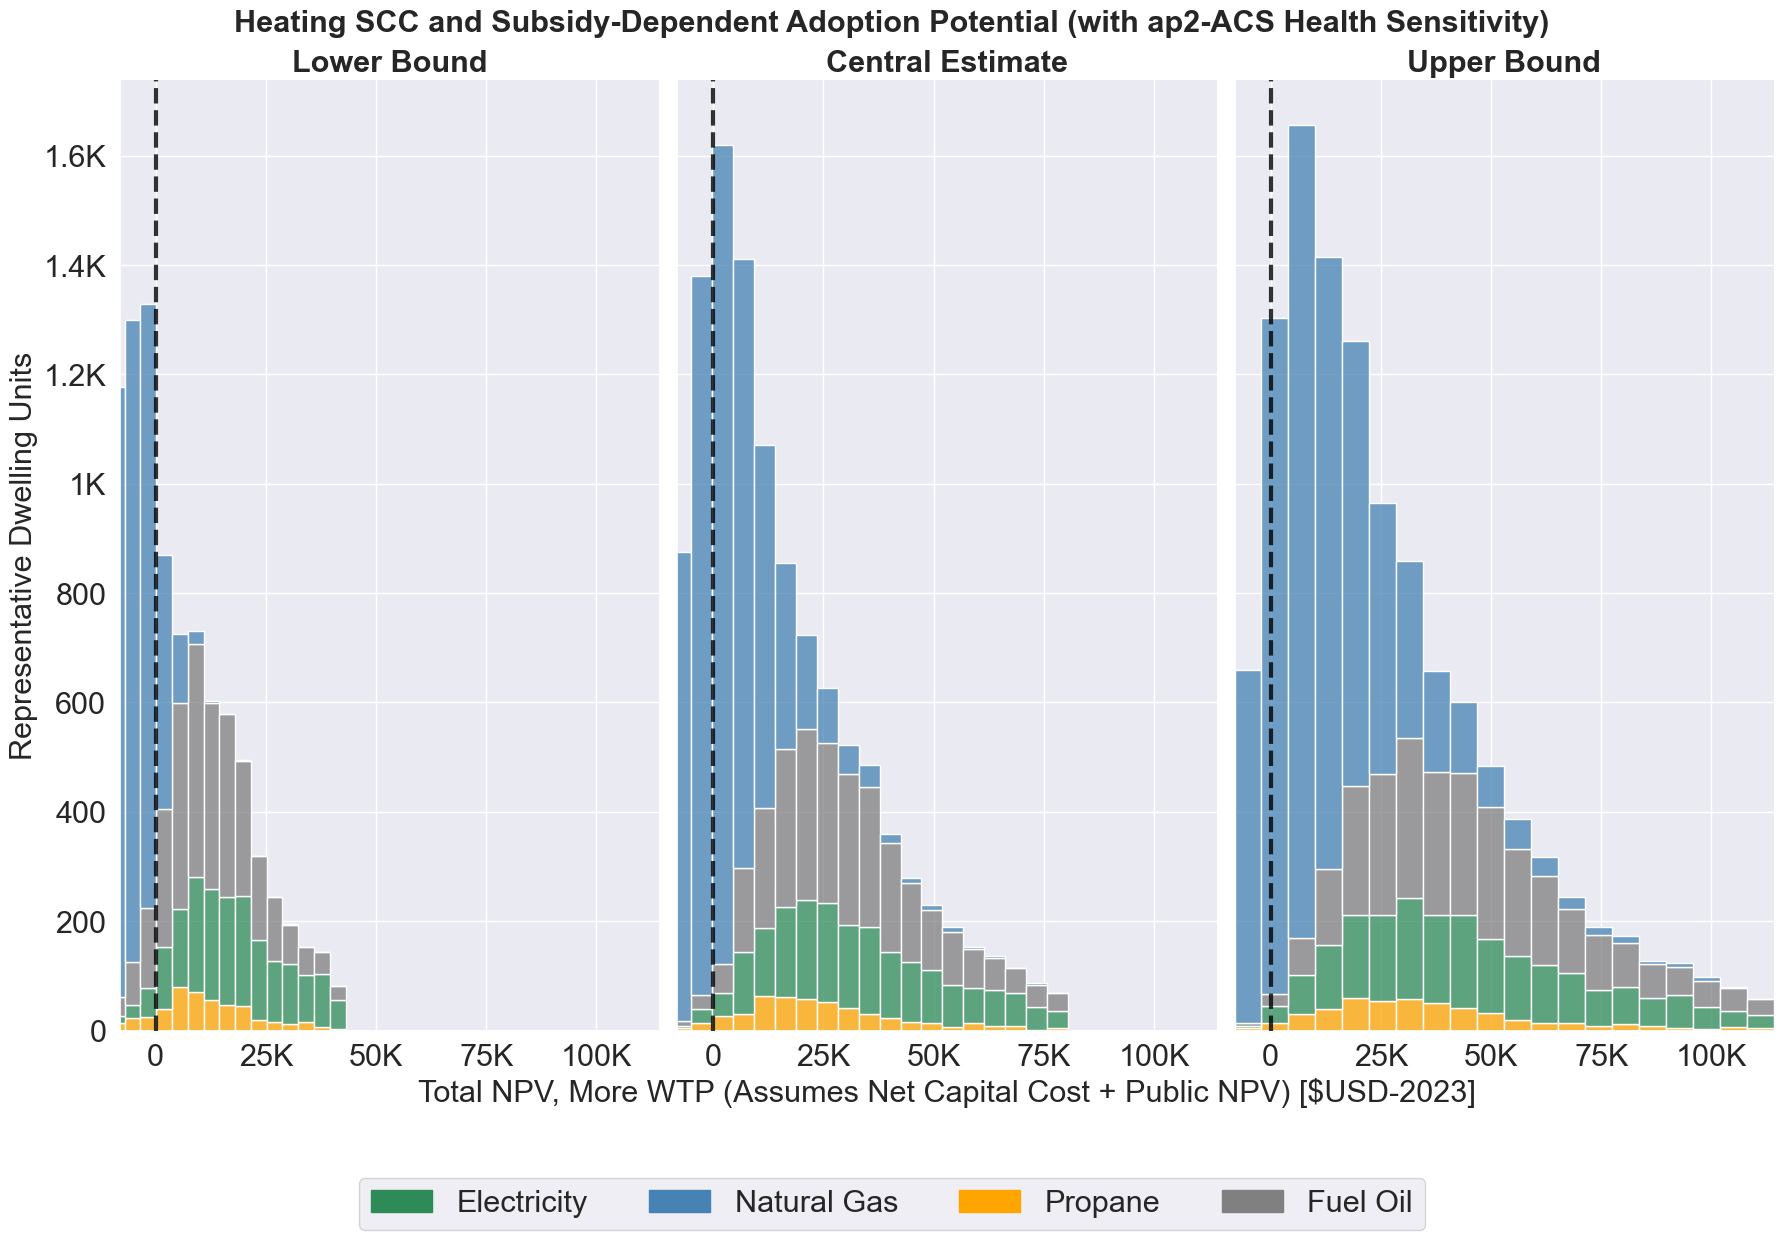

In [29]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    x_labels=[
        '',
        'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    suptitle=f'{category.title()} SCC and Subsidy-Dependent Adoption Potential (with ap2-ACS Health Sensitivity)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    fuel_column=f'base_{category}_fuel'
)

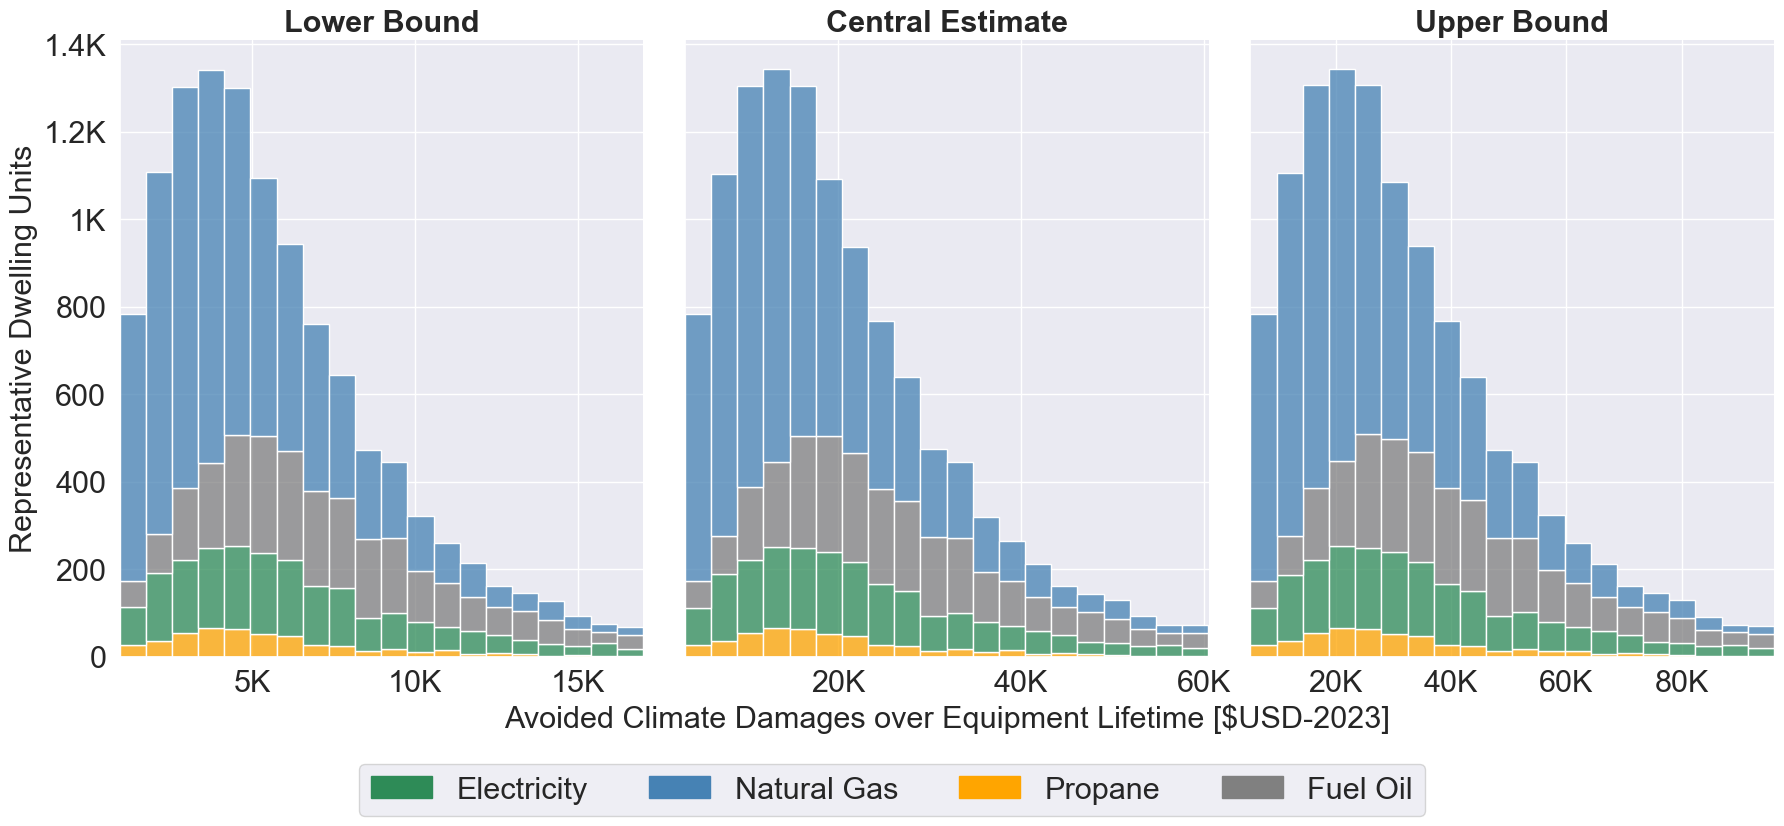

In [30]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_easiur,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    x_labels=[
        '',
        'Avoided Climate Damages over Equipment Lifetime [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    # suptitle=f'{category.title()} Social Cost of Carbon and Subsidy-Dependent Adoption Potential (Tier 3)',
    figure_size=(18, 8),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

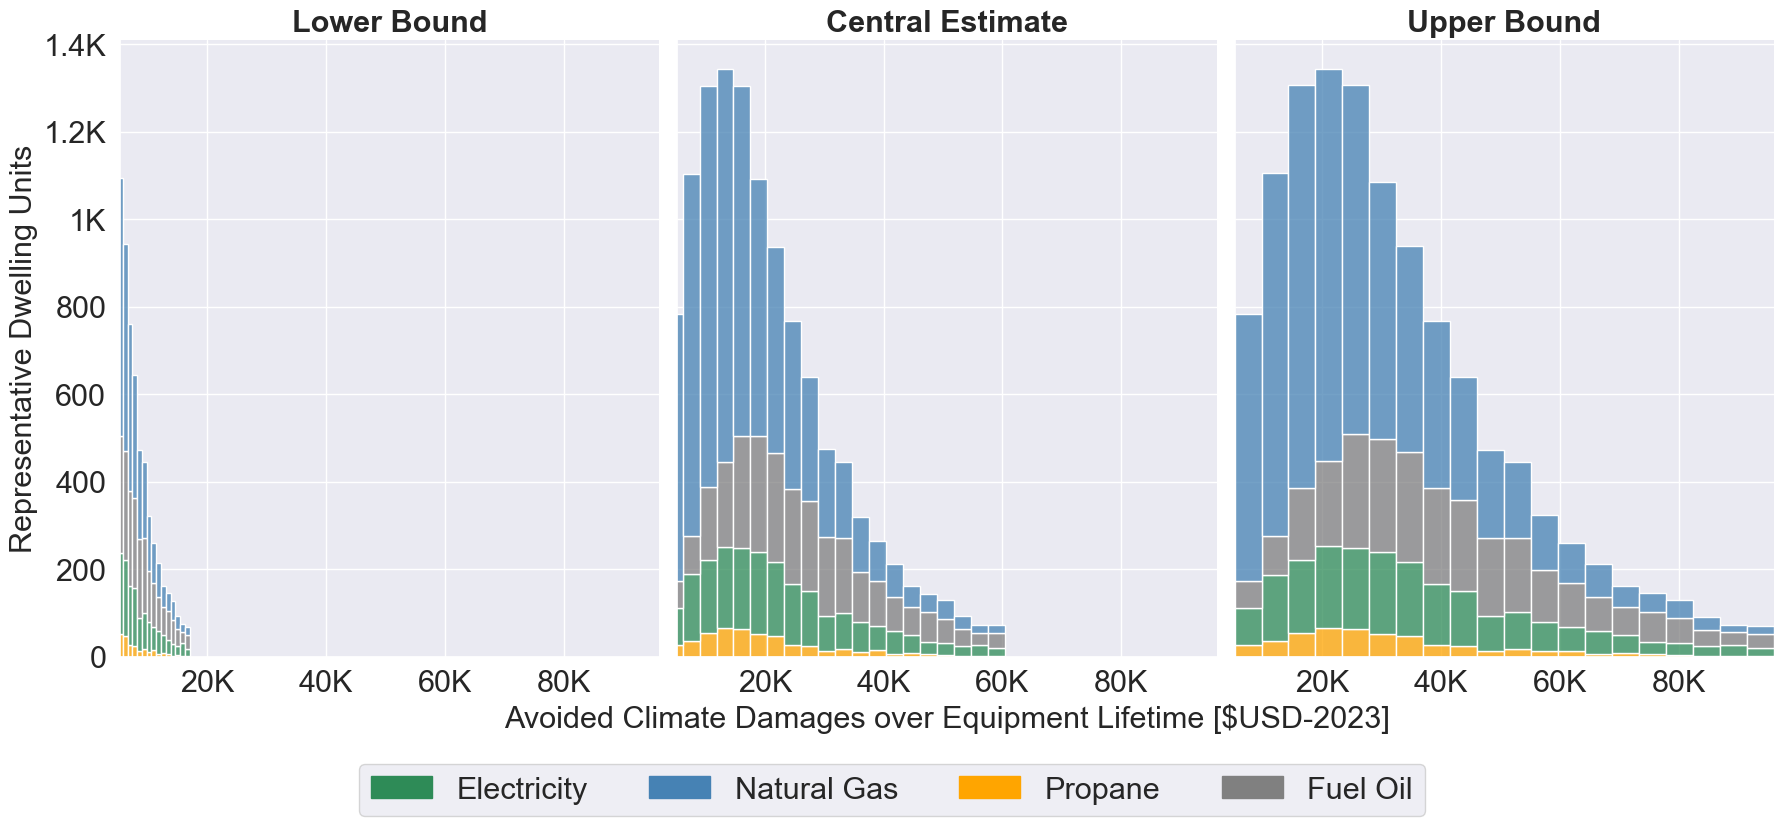

In [31]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_easiur,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    x_labels=[
        '',
        'Avoided Climate Damages over Equipment Lifetime [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    # suptitle=f'{category.title()} Social Cost of Carbon and Subsidy-Dependent Adoption Potential (Tier 3)',
    figure_size=(18, 8),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

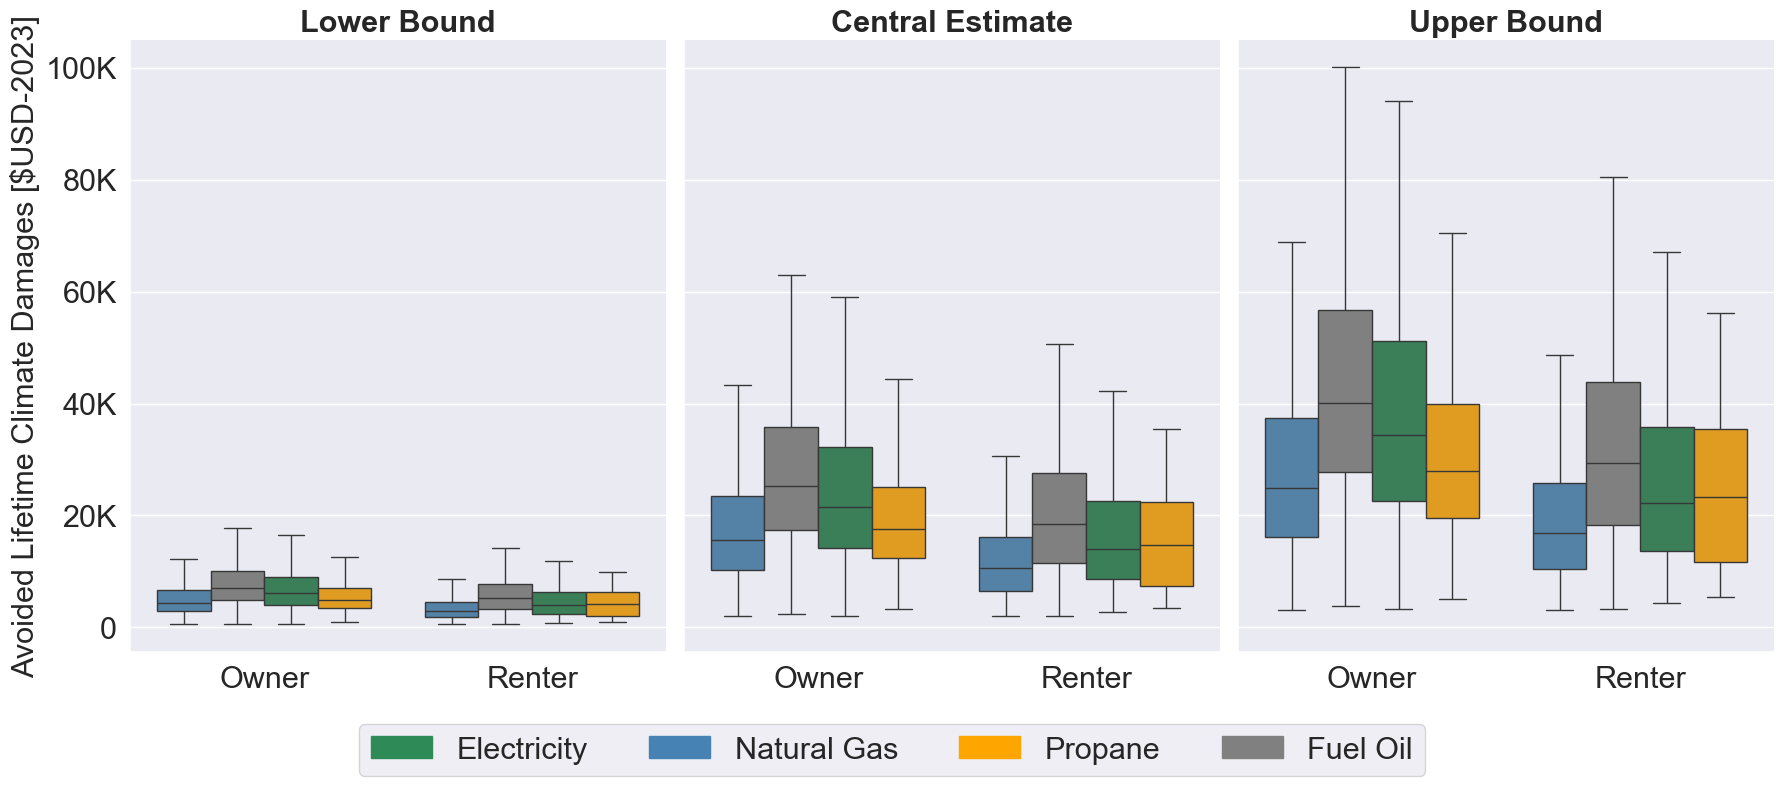

In [32]:
# Climate Damages Sensitivity Analysis
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_climate_damages = create_subplot_grid_boxplot(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    category_col='tenure',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    x_labels=['', '', ''],
    y_labels=['Avoided Lifetime Climate Damages [$USD-2023]', '', ''],
    figure_size=(18, 8),
    show_outliers=False,
    palette=color_map_fuel
)

In [33]:
# Climate Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower': 'Lower Bound',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central': 'Central Estimate',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper': 'Upper Bound'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

Filtered for the following fuels: ['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']


Lower Bound Central Estimate Upper Bound
count    12266.00         12266.00    12266.00
mean      5979.18         21241.25    33731.02
std       4325.87         15370.75    24411.06
min       -245.65          -873.94    -1388.78
25%       3092.86         10981.40    17434.09
50%       4939.24         17550.32    27861.17
75%       7679.91         27290.88    43339.50
max      43829.29        155621.15   247058.06

In [34]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_ap2,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',  # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',  # AP2-H6C from df_ap2
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs': 'AP2-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c': 'AP2-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)


Filtered for the following fuels: ['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']


AP2-ACS    AP2-H6C
count  12266.00   12266.00
mean     438.51    1126.60
std     2217.05    5696.25
min    -8077.24  -20753.18
25%     -524.23   -1346.97
50%     -158.59    -407.49
75%      346.52     890.24
max    29205.40   75037.15

In [35]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',  # EASIUR-H6C from df_easiur
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs': 'EASIUR-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c': 'EASIUR-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

Filtered for the following fuels: ['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']


EASIUR-ACS EASIUR-H6C
count   12266.00   12266.00
mean     2288.74    5880.43
std      2704.10    6947.65
min     -1043.70   -2681.67
25%       623.97    1603.15
50%      1352.06    3473.85
75%      2955.91    7594.64
max     33601.23   86332.01

In [36]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_inmap,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',  # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c',  # InMAP-H6C from df_inmap
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs': 'InMAP-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c': 'InMAP-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

Filtered for the following fuels: ['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']


InMAP-ACS  InMAP-H6C
count  12266.00   12266.00
mean    2506.86    6440.87
std     3751.49    9638.74
min    -8814.19  -22646.50
25%      348.45     895.22
50%     1395.42    3585.21
75%     3316.76    8521.80
max    84195.42  216324.97

In [42]:
def validate_within_category_consistency(df_climate, df_health, df_npv):
    """
    CORRECTED validation test that checks for consistency WITHIN categories,
    not across categories (which should differ based on retrofit eligibility).
    
    Args:
        df_climate: Results from calculate_lifetime_climate_impacts
        df_health: Results from calculate_lifetime_health_impacts  
        df_npv: Results from calculate_public_npv
        
    Returns:
        dict: Summary of validation results
    """
    results = {
        'climate_within_category_consistency': True,
        'health_within_category_consistency': True,
        'category_analysis': {},
        'issues_found': []
    }
    
    # Define expected categories
    categories = ['heating', 'waterHeating', 'clothesDrying', 'cooking']
    scc_assumptions = ['lower', 'central', 'upper']
    mer_types = ['lrmer', 'srmer']
    rcm_models = ['ap2', 'easiur', 'inmap']
    cr_functions = ['acs', 'h6c']
    
    # Test 1: Climate impact consistency WITHIN each category
    for category in categories:
        category_counts = []
        category_cols = []
        
        # Check all SCC assumptions and MER types for this category
        for scc in scc_assumptions:
            for mer in mer_types:
                col_pattern = f'_lifetime_damages_climate_{mer}_{scc}'
                matching_cols = [col for col in df_climate.columns 
                               if category in col and col_pattern in col]
                
                for col in matching_cols:
                    count = df_climate[col].notna().sum()
                    category_counts.append(count)
                    category_cols.append(col)
        
        # All counts within this category should be identical
        unique_counts = set(category_counts)
        if len(unique_counts) > 1:
            results['climate_within_category_consistency'] = False
            results['issues_found'].append(
                f"Climate {category} counts vary: {unique_counts}"
            )
        
        results['category_analysis'][f'{category}_climate'] = {
            'count': list(unique_counts)[0] if len(unique_counts) == 1 else unique_counts,
            'columns_checked': len(category_cols)
        }
    
    # Test 2: Health impact consistency WITHIN each category  
    for category in categories:
        for rcm in rcm_models:
            for cr in cr_functions:
                combo_counts = []
                combo_cols = []
                
                col_pattern = f'_lifetime_damages_health_{rcm}_{cr}'
                matching_cols = [col for col in df_health.columns 
                               if category in col and col_pattern in col]
                
                for col in matching_cols:
                    count = df_health[col].notna().sum()
                    combo_counts.append(count)
                    combo_cols.append(col)
                
                # All counts for this RCM/CR combo within category should be identical
                unique_counts = set(combo_counts)
                if len(unique_counts) > 1:
                    results['health_within_category_consistency'] = False
                    results['issues_found'].append(
                        f"Health {category} {rcm}_{cr} counts vary: {unique_counts}"
                    )
    
    # Test 3: Cross-module consistency (climate vs health within same category)
    for category in categories:
        # Get climate count for this category (should be same across all SCC/MER)
        climate_col = [col for col in df_climate.columns 
                      if category in col and 'lifetime_damages_climate' in col][0]
        climate_count = df_climate[climate_col].notna().sum()
        
        # Get health count for this category (should be same across all RCM/CR)
        health_col = [col for col in df_health.columns 
                     if category in col and 'lifetime_damages_health' in col][0]
        health_count = df_health[health_col].notna().sum()
        
        if climate_count != health_count:
            results['issues_found'].append(
                f"Climate vs Health count mismatch for {category}: {climate_count} vs {health_count}"
            )
        
        results['category_analysis'][f'{category}_total'] = {
            'climate_count': climate_count,
            'health_count': health_count,
            'consistent': climate_count == health_count
        }
    
    return results

def run_corrected_validation_tests(df_climate, df_health, df_npv):
    """Run corrected validation tests that understand category differences are expected."""
    
    print("="*70)
    print("CORRECTED VALIDATION FRAMEWORK CONSISTENCY CHECK")
    print("="*70)
    print("✅ Testing WITHIN-category consistency (not across categories)")
    print("✅ Category count differences are EXPECTED and CORRECT")
    
    results = validate_within_category_consistency(df_climate, df_health, df_npv)
    
    print(f"\n✅ Climate Within-Category Consistency: {'PASS' if results['climate_within_category_consistency'] else 'FAIL'}")
    print(f"✅ Health Within-Category Consistency: {'PASS' if results['health_within_category_consistency'] else 'FAIL'}")
    
    # Show category analysis
    print(f"\n📊 CATEGORY ANALYSIS:")
    for category, analysis in results['category_analysis'].items():
        if 'total' in category:
            cat_name = category.replace('_total', '')
            print(f"   {cat_name.upper()}: Climate={analysis['climate_count']}, Health={analysis['health_count']} ({'✅' if analysis['consistent'] else '❌'})")
    
    if results['issues_found']:
        print(f"\n⚠️  Issues Found:")
        for issue in results['issues_found']:
            print(f"   - {issue}")
    else:
        print(f"\n🎉 All validation tests PASSED!")
        print("   ✅ Within-category consistency perfect")
        print("   ✅ Climate-Health alignment correct") 
        print("   ✅ Validation framework working properly")
        print("   ✅ Category differences reflect business logic")
    
    return results

# Usage example:
# results = run_corrected_validation_tests(df_climate_main, df_health_main, df_npv_results)

In [44]:
run_corrected_validation_tests(
    df_climate=df_mp8_IRA_damages_climate,  # Replace with your actual DataFrame
    df_health=df_mp8_IRA_damages_health,      # Replace with your actual DataFrame
    df_npv=df_outputs_basic_home_easiur       # Replace with your actual DataFrame
)

CORRECTED VALIDATION FRAMEWORK CONSISTENCY CHECK
✅ Testing WITHIN-category consistency (not across categories)
✅ Category count differences are EXPECTED and CORRECT

✅ Climate Within-Category Consistency: PASS
✅ Health Within-Category Consistency: PASS

📊 CATEGORY ANALYSIS:
   HEATING: Climate=12266, Health=12266 (✅)
   WATERHEATING: Climate=14999, Health=14999 (✅)
   CLOTHESDRYING: Climate=14743, Health=14743 (✅)
   COOKING: Climate=7867, Health=7867 (✅)

🎉 All validation tests PASSED!
   ✅ Within-category consistency perfect
   ✅ Climate-Health alignment correct
   ✅ Validation framework working properly
   ✅ Category differences reflect business logic


{'climate_within_category_consistency': True,
 'health_within_category_consistency': True,
 'category_analysis': {'heating_climate': {'count': 12266,
   'columns_checked': 6},
  'waterHeating_climate': {'count': 14999, 'columns_checked': 6},
  'clothesDrying_climate': {'count': 14743, 'columns_checked': 6},
  'cooking_climate': {'count': 7867, 'columns_checked': 6},
  'heating_total': {'climate_count': 12266,
   'health_count': 12266,
   'consistent': True},
  'waterHeating_total': {'climate_count': 14999,
   'health_count': 14999,
   'consistent': True},
  'clothesDrying_total': {'climate_count': 14743,
   'health_count': 14743,
   'consistent': True},
  'cooking_total': {'climate_count': 7867,
   'health_count': 7867,
   'consistent': True}},
 'issues_found': []}

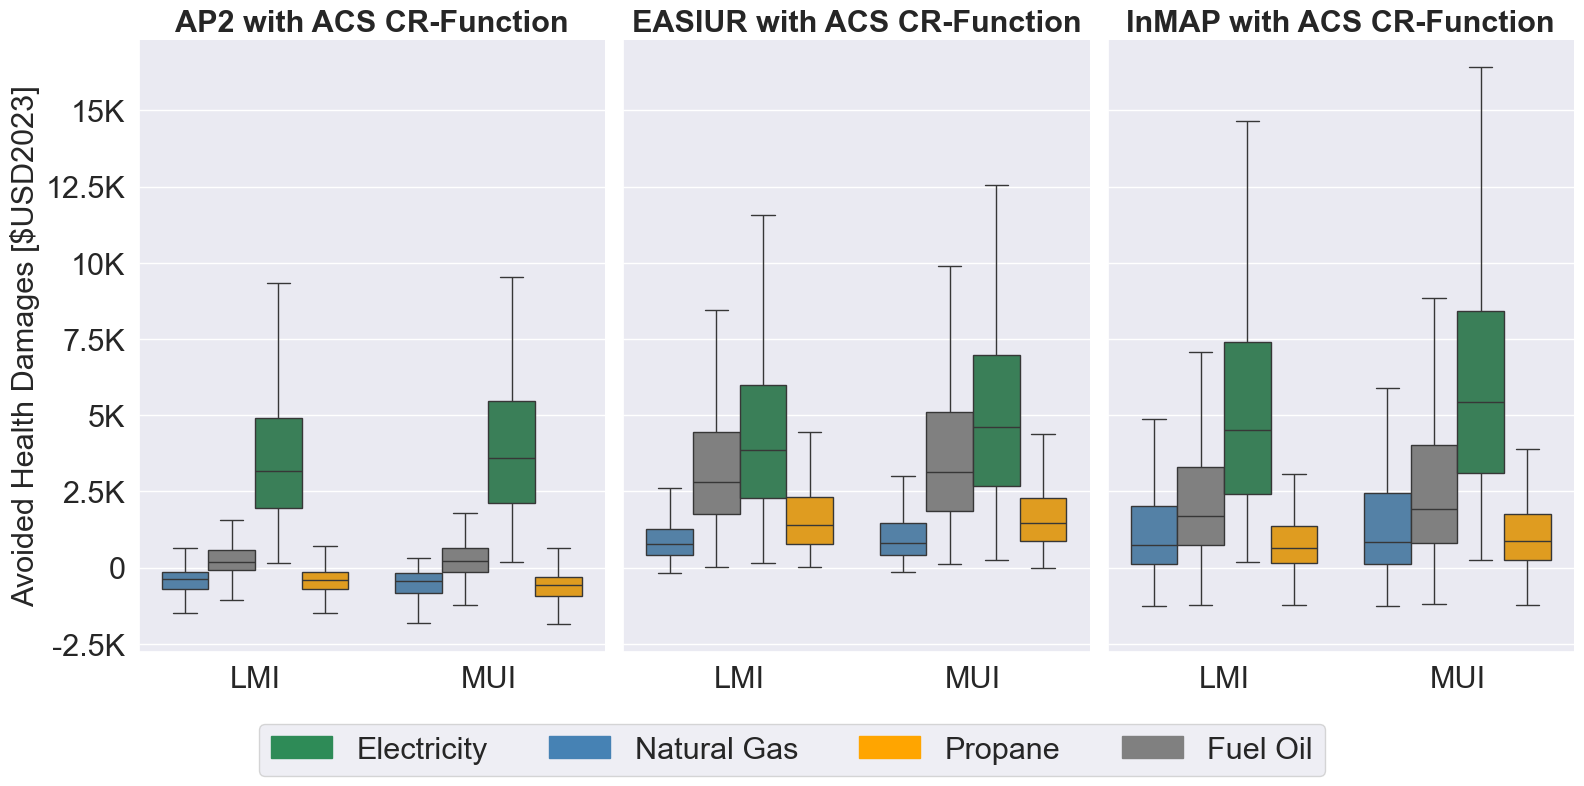

In [37]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_avoid_health_lmi_status = create_subplot_grid_boxplot(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs'
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 with ACS CR-Function', 'EASIUR with ACS CR-Function', 'InMAP with ACS CR-Function'],
    x_labels=['', '', ''],
    y_labels=['Avoided Health Damages [$USD2023]', '', ''],
    figure_size=(16, 8),
    show_outliers=False,
    palette=color_map_fuel
)

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with InMAP-ACS)

# SENSITIVITY ANALYSIS: Public Health Impact with Different Reduced Complexity Models and Concentration Response Functions

In [38]:
print(df_outputs_basic_home_ap2.columns.to_list())

['square_footage', 'census_region', 'census_division', 'census_division_recs', 'building_america_climate_zone', 'reeds_balancing_area', 'gea_region', 'state', 'city', 'county', 'county_fips', 'puma', 'county_and_puma', 'weather_file_city', 'Longitude', 'Latitude', 'building_type', 'income', 'federal_poverty_level', 'occupancy', 'tenure', 'vacancy_status', 'base_heating_fuel', 'heating_type', 'hvac_cooling_type', 'vintage', 'base_heating_efficiency', 'base_electricity_heating_consumption', 'base_fuelOil_heating_consumption', 'base_naturalGas_heating_consumption', 'base_propane_heating_consumption', 'base_waterHeating_fuel', 'waterHeating_type', 'base_electricity_waterHeating_consumption', 'base_fuelOil_waterHeating_consumption', 'base_naturalGas_waterHeating_consumption', 'base_propane_waterHeating_consumption', 'base_clothesDrying_fuel', 'base_electricity_clothesDrying_consumption', 'base_naturalGas_clothesDrying_consumption', 'base_propane_clothesDrying_consumption', 'base_cooking_fue

## Discounted Avoided Damages

### Air-Source Heat Pumps (ASHP)

IndexError: index 2 is out of bounds for axis 1 with size 2

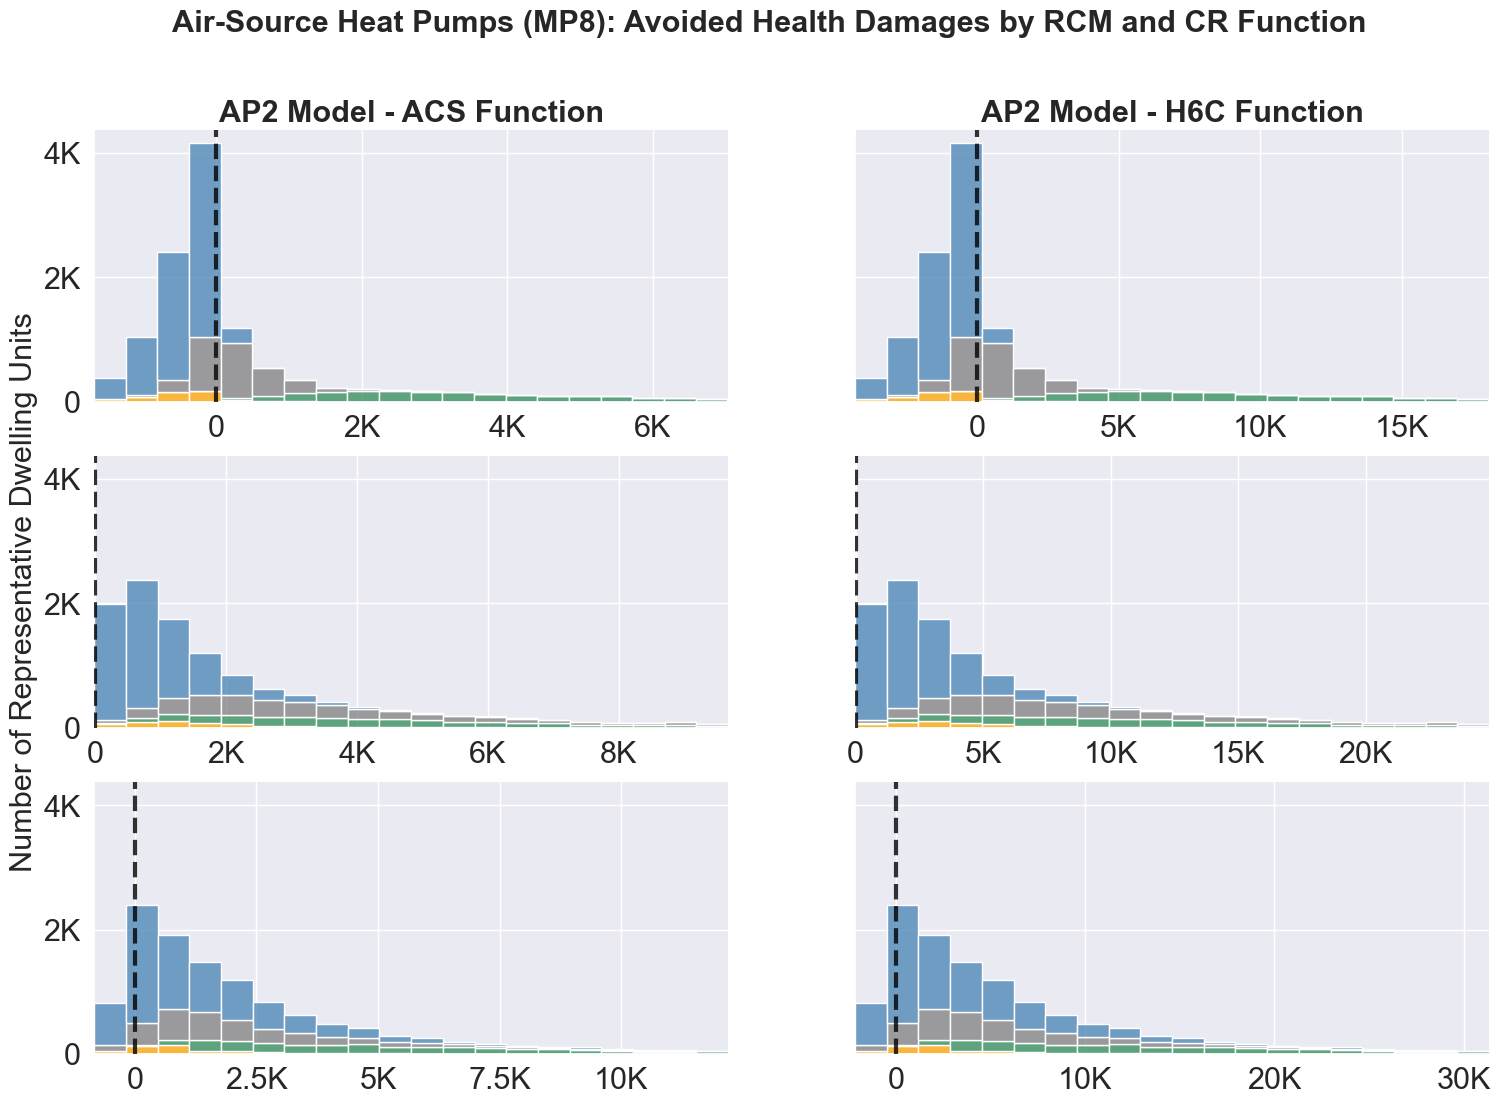

In [39]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c'
    ],
    x_labels=['', '', '', '', '', ''],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Avoided Health Damages by RCM and CR Function',
    figure_size=(18, 12),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Water Heating

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'waterHeating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', 'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Water Heaters (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Clothes Drying

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'clothesDrying'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Clothes Dryers (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Electric Cooking Ranges

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'cooking'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Electric Cooking Ranges (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

## Health Impact and Subsidy-Dependent Adoption Potential

### Air-Source Heat Pumps (ASHP)

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=['', '', '', '', '', ''],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Water Heating

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'waterHeating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', 'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Water Heaters (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Clothes Drying

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'clothesDrying'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Clothes Dryers (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Electric Cooking Ranges

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'cooking'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Electric Cooking Ranges (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

In [ ]:
fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap,
        df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap  
        ],
    dataframe_indices=[0, 1, 2, 0, 1, 2],  # Changed from [0, 0, 0, 1, 1, 1]
    subplot_positions=[
        (0, 0), (0, 1), (0, 2),
        (1, 0), (1, 1), (1, 2)
        ],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
        ],
   x_labels=[
        '', '', '',
        '', '', ''
    ],
    y_labels=[
        '', '', '',
        '', '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'EASIUR Model - ACS Function', 'InMAP Model - ACS Function',
        'AP2 Model - H6C Function', 'EASIUR Model - H6C Function', 'InMAP Model - H6C Function',
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(16, 12),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Model Runtime

In [ ]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")